In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import figure, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from scipy.optimize import curve_fit
import radioactivedecay as rd
from mendeleev import element
from matplotlib.ticker import AutoMinorLocator

plt.rc("xtick", labelsize=10, top=True,direction="in") #Fontstørrelse på akser, ticks indad
plt.rc("ytick", labelsize=10, right=True, direction="in") #Samme som ovenstående men for y
plt.rc("axes", grid=True, linewidth=1.3) #Slår grid til, og sætter tykkelsen af plot-spine
plt.rc("grid", ls=":", lw=1) #Sætter gridstyle som ":"
plt.rc('font', size=10) #Font og fontstørrelse
plt.rc("figure", figsize=(8,4), dpi=150) #Figurstørrelse og opløsningen på graferne
plt.rc("ytick.major", width=1.3) #Sætter tykkelsen på yticks
plt.rc("xtick.major", width=1.3) #Sætter tykkelsen på xticks

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#### paths ####  # Zn 0.37 resten cobber. 
# TODO: 1 kør med korrekt combination af mseeing 
# 2 kør med deres energi og se om de samme nuclei skabes som dem
# 3 fix sobp.dat fil og prøv at kør den treatmentplan uden collimator og med collimator 

absolute_path = os.path.abspath('').rstrip("/python_notebook")
brass20_1p25_paths = glob.glob(absolute_path + "/Full_Sim/20brass1p25mm/20brass1p25*sum.lis")
brass20_1p25_paths.sort()

brass20_1p25_data = glob.glob(absolute_path + "/Full_Sim/20brass1p25mm/20brass1p25*plot.dat")
brass20_1p25_data.sort()

brass1p27_data = glob.glob(absolute_path + "/Full_Sim/50brass1p27mm/50brass1p27*plot.dat")
brass1p27_data.sort()

# all these are dz = 50 mm 
brass1p0_paths = glob.glob(absolute_path + "/Full_Sim/50brass1p0mm/50brass1p0*sum.lis")
brass1p0_paths.sort()
brass1p27_paths = glob.glob(absolute_path + "/Full_Sim/50brass1p27mm/50brass1p27*sum.lis")
brass1p27_paths.sort()
brass1p5_paths = glob.glob(absolute_path + "/Full_Sim/50brass1p5mm/50brass1p5*sum.lis")
brass1p5_paths.sort()

nbrass1p27_paths = glob.glob(absolute_path + "/Full_Sim/n50brass1p27mm/n50brass1p27*sum.lis")
nbrass1p27_paths.sort()

tungsten1p0_paths = glob.glob(absolute_path + "/Full_Sim/20tungsten1p0mm/20tungsten1p0*sum.lis")
tungsten1p0_paths.sort()
tungsten1p27_paths = glob.glob(absolute_path + "/Full_Sim/20tungsten1p27mm/20tungsten1p27*sum.lis")
tungsten1p27_paths.sort()
tungsten1p5_paths = glob.glob(absolute_path + "/Full_Sim/20tungsten1p5mm/20tungsten1p5*sum.lis")
tungsten1p5_paths.sort()

tungsten1p27_data = glob.glob(absolute_path + "/Full_Sim/20tungsten1p27mm/20tungsten1p27*plot.dat")
tungsten1p27_data.sort()

tungsten1p27_nothing = glob.glob(absolute_path + "/Full_Sim/20tungstenvacuum/20tungsten1p27*sum.lis")
tungsten1p27_nothing.sort()

tungsten1p27_vacuum_water = glob.glob(absolute_path + "/Full_Sim/20tungstenwatervacuum/20tungsten1p27*sum.lis")
tungsten1p27_vacuum_water.sort()

sobp_path = absolute_path + "/sobp_format.dat"

treatmentplan_no_grid=glob.glob(absolute_path + "/correct_treatmentplan/no_grid/treatment_simulation_*_plot.dat")
treatmentplan_no_grid.sort()

treatmentplan_no_grid_le=glob.glob(absolute_path + "/correct_treatmentplan/no_gridlargede/treatment_simulation_*_plot.dat")
treatmentplan_no_grid_le.sort()

treatmentplan_grid=glob.glob(absolute_path + "/correct_treatmentplan/grid_50brass1p25mm/treatment_grid_50brass1p25*_plot.dat")
treatmentplan_grid.sort()

treatmentplan_grid_lis=glob.glob(absolute_path + "/correct_treatmentplan/grid_50brass1p25mm/treatment_grid_50brass1p25*_sum.lis")
treatmentplan_grid_lis.sort()

treatmentplan_grid_air_lis=glob.glob(absolute_path + "/correct_treatmentplan/copygridnowaterNox/treatment_nogrid_50brass1p25*_sum.lis")
treatmentplan_grid_air_lis.sort()

brasstest = glob.glob(absolute_path + "/Full_Sim/50brass1p5mm/50brass1p5*sum.lis")
brasstest.sort()


test_script = glob.glob(absolute_path + "/reliability/recreation_*_sum.lis")
test_script.sort()

In [3]:
columns = ["E", "dE", "X", "Y", "FWHMx", "FWHMy", 1, 2, 3, 4, "W"]
sobp_data = pd.DataFrame(np.loadtxt(sobp_path, skiprows=2), columns=columns)
sobp_data = sobp_data.drop(columns=[1,2,3,4])

In [4]:
def cal_p(e, m):
    """
    e: Energy in GeV
    m: Mass in Gev/c^2
    """
    return np.sqrt((e+m)**2-m**2)

def cal_p2(e, m):
    """
    e: Energy in GeV
    m: Mass in Gev/c^2
    """
    return np.sqrt((2*e*m)**2-m**2)
    

In [5]:
proton_mass = 0.938272088  # Gev/c^2
energy_low = 0.0955865-0.000090  # GeV
energy_high = 0.0966875+0.000090 # GeV
energy_mid = 0.096137  # GeV 0.000090


In [6]:
((cal_p(energy_mid, proton_mass) - cal_p((energy_high - energy_mid)*2 + energy_mid, proton_mass))*2)

-0.006068149751317864

In [7]:
#sobp_data= sobp_data.drop(columns=["dE"])
#sobp_data["dE"] = sobp_data["dE"].values*10
sobp_data.describe()

E          dE           X           Y       FWHMx       FWHMy  \
count  784.000000  784.000000  784.000000  784.000000  784.000000  784.000000   
mean     0.096137    0.001101    0.014085   -0.305278    0.762958    0.925632   
std      0.007407    0.000067    3.389166    1.061668    0.023224    0.029311   
min      0.084350    0.000990   -6.026210   -2.041070    0.732420    0.893950   
25%      0.090840    0.001050   -2.906112   -1.244190    0.740940    0.899390   
50%      0.097380    0.001120    0.000000   -0.000000    0.756000    0.912790   
75%      0.103900    0.001170    2.948090    0.622090    0.774800    0.938020   
max      0.107160    0.001190    6.026210    1.360710    0.807160    0.985730   

                  W  
count  7.840000e+02  
mean   9.202957e+08  
std    8.807531e+08  
min    3.317676e+07  
25%    4.296049e+08  
50%    6.050727e+08  
75%    9.661436e+08  
max    4.828090e+09

fmt = '%1.5f', '%1.5f', '%1.5f','%1.5f','%1.5f' ,'%1.5f', '%.8e'
# no_gridlargede no_grid
np.savetxt(absolute_path + "/correct_treatmentplan/no_gridlargede/sobp.dat", sobp_data.values, delimiter=', ', fmt=fmt)

df = pd.DataFrame(columns=["target"])
for i in range(1, 21):
    df = pd.concat(
        [df,pd.DataFrame(columns=["target"],
                         data=[f"RESNUCLE          3.      -{i+50}.                      TARGET16     12.5 col{i}"])]
                   , join="inner")
df.to_csv(absolute_path + "/correct_treatmentplan/grid_50brass1p25mm/extra.dat")

In [8]:
cool_times_dict = {
    "cool1": 300, "cool2": 900, "cool3": 3600, "cool4": 7200, "cool5": 14400, "cool6": 28800, "cool7": 57600,
    "cool8": 86400, "cool9": 115200, "cool10": 259200, "cool11": 450, "cool12": 1400, "cool13": 2500, 
    "cool14": 5400, "cool15": 10800, "cool16": 360000, "cool17": 21600, "cool18": 43200, "cool19": 150,
    "cool20": 600, "cool30": 0
}

In [9]:
cool_times_dict.values()

dict_values([300, 900, 3600, 7200, 14400, 28800, 57600, 86400, 115200, 259200, 450, 1400, 2500, 5400, 10800, 360000, 21600, 43200, 150, 600, 0])

In [73]:
def get_df_tab(path: str) -> [pd.DataFrame, pd.DataFrame]:
    df = pd.read_csv(path)
    cool_time = cool_times_dict[df.iloc[0, 0].replace(" ", "")]
    vals = df.loc[df[df.columns[0]].str.contains("#")].index.values
    df_isotopes = df.iloc[vals[0]+1:vals[1], 0].str.split(expand = True).astype(float)
    df_isomer = df.iloc[vals[1]+1:, 0].str.split(expand = True).astype(float)
    df_isotopes.columns = ["A", "Z", "Bq", "dBq"]
    df_isotopes.columns.name = cool_time
    df_isomer.columns = ["A", "Z", "m", "Bq", "dBq"]
    df_isomer.columns.name = cool_time
    return df_isotopes, df_isomer

def get_df_sum(path: str, extra = False, number = 3, other=False) -> [pd.DataFrame, pd.DataFrame]:
    skipper = 18
    if extra:
        skipper = 194
    df = pd.read_csv(path, skiprows=skipper)
    vals = df.loc[df[df.columns[0]].str.contains("A")].index.values
    for i in range(len(vals)-1):
        if vals[i+1]-vals[i] <= 1:
            continue
        columns = df.iloc[vals[i], 0].split()[3:]
        dff = df.iloc[vals[i]+1:vals[i+1], 0].str.split(expand = True).reset_index().drop("index", axis=1)
        try:
            ff = dff.loc[::2,:len(columns)].set_index(0).replace("********", "0").astype(float)
        except ValueError:
            dff = dff.drop(dff.tail(1).index)
            ff = dff.loc[::2,:len(columns)].set_index(0).replace("********", "0").astype(float)
        ff.columns = columns
        dd = df.iloc[vals[i]+1:vals[i+1], 0]
        dd = dd.str.replace("+", "", regex=True)
        dd = dd.str.replace("/", "", regex=True)
        dd = dd.str.replace("-", "", regex=True)
        dd = dd.str.replace("%", "", regex=True)
        dd = dd.str.split(expand = True).reset_index().drop("index", axis=1)
        dg = dd.loc[1::2,:len(columns)-1].astype(float)
        dg.columns = columns
        dg.index = ff.index
        if i == 0:
            tot_df = ff
            tot_df_d = dg
        else:
            tot_df = pd.concat([tot_df, ff])
            tot_df_d = pd.concat([tot_df_d, dg])
    minus = 20
    if other:
        minus = 50
    name = cool_times_dict[f"cool{int(path.split('_')[number])-minus}"]
    tot_df_d.columns.name = name
    tot_df.columns.name = name
    return tot_df, tot_df_d
    
        
    
def plot_img(df: pd.DataFrame, pivot: bool, transpose = False) -> None:
    plt.figure(figsize=(7, 5))
    plt.title(f"Cooling time in sec = {df.columns.name}")
    ax = plt.gca()
    if pivot:
        data = df.pivot_table(index='Z', columns='A', values='Bq')
    else:
        df.index = df.index.astype(int)
        df = df.sort_index()
        last_value = df.index[-1]
        df = df.transpose()
        df.index = df.index.astype(int)
        df = df.sort_index()
        last_value2 = df.index[-1]
        aa = pd.DataFrame(index=range(last_value+1), columns =range(last_value2+1))
        aa.iloc[df.columns.values, df.index.values] = df.transpose().values
        data = aa.fillna(0)
    if transpose:
        data = data.transpose()
    im = ax.imshow(data, cmap=cm.gnuplot, norm=LogNorm(vmin=0.1, vmax=10000), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.xlabel("A")
    plt.ylabel("Z")
    plt.colorbar(im, cax=cax)
    plt.show()
    return 


def find_elements(df: pd.DataFrame, threshold: float, cool_in_sec=False) -> pd.DataFrame:
    A = np.array([])
    Z = np.array([])
    value = np.array([])
    for i in df.columns:
        temp_df = df.loc[df[i] > threshold, i]
        A = np.concatenate((A, temp_df.index.values), axis=None)
        Z = np.concatenate((Z, int(i)*np.ones(len(temp_df.values))), axis=None)
        value = np.concatenate((value, temp_df.values), axis=None)
    
    df_return = pd.DataFrame(A, columns=["A"])
    df_return["Z"] = Z.astype(int)
    df_return["Bq"] = value
    print("Cooling time =", df.columns.name if cool_in_sec else df.columns.name/60/60,
          "Seconds" if cool_in_sec else "Hours",
          f"| Threshold = {threshold:.0f}")
    return df_return.sort_values("Bq", ascending=False)


def sort_df(df: pd.DataFrame) -> pd.DataFrame:
    A = np.array([])
    Z = np.array([])
    value = np.array([])
    for i in df.columns:
        temp_df = df.loc[:,i]
        A = np.concatenate((A, temp_df.index.values), axis=None)
        Z = np.concatenate((Z, int(i)*np.ones(len(temp_df.values))), axis=None)
        value = np.concatenate((value, temp_df.values), axis=None)
    
    df_return = pd.DataFrame(A, columns=["A"])
    df_return["Z"] = Z.astype(int)
    df_return["Bq"] = value
    return df_return.fillna(0)


def indv_atom(paths: list, A: str, Z: str, number=3) -> list:
    values = []
    for i in paths:
        try:
            ff1, uncb = get_df_sum(i, number=number)
            values.append(ff1.loc[A, Z].sum())
        except Exception as e:
            print("error : ", e)
            values.append(0)
    return values


def plot_spec(type_: str, A: list, Z: list, number=3, ylog=False) -> None:
    paths = type_
    times = []
    
    for path in paths:
        times.append(cool_times_dict[f"cool{int(path.split('_')[number])-20}"])
        
    data = pd.DataFrame(index=times)
    for a, z in zip(A, Z):
        data[f"{a}, {z}"] = indv_atom(type_, a, z, number=number)
    data = data.sort_index()
    for i in data.columns:
        plt.plot(data.index.values/60/60, data[i].values, label=i)
    plt.xlabel("Hours")
    plt.ylabel("Bq")
    if ylog:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    return
    

def get_df_from_data(path: str, one_dim=False) -> pd.DataFrame:
    values = np.loadtxt(path)
    columns = ["z", "value", "error"] if one_dim else ["x", "y", "value", "error"]
    df = pd.DataFrame(data=values, columns=columns)
    return df
    
    
def plot_datfile(path, onedim=False) -> None:
    df = get_df_from_data(path, onedim)
    if onedim:
        plt.errorbar(df["z"].values, df["value"].values, yerr=df["error"].values, fmt="o", markersize=4
                     , capsize=5)
        plt.show()
    else:
        data = df.pivot_table(index='x', columns='y', values='value')
        fig, ax = plt.subplots(figsize=(20, 4))
        im = ax.imshow(data, cmap=cm.gnuplot, norm=LogNorm(vmin=data.min().min(), vmax=data.max().max())
                       , origin='lower')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.xlabel("A")
        plt.ylabel("Z")
        plt.colorbar(im, cax=cax)
        plt.show()

        
def get_val_unc(paths, datapath, number=3):
    times = []
    sums = []
    uncs = []

    for path in paths:
        try:
            df, unc = get_df_sum(path, number=number)
            sums.append(df.sum().sum()/get_gy_value(datapath))
            times.append(cool_times_dict[f"cool{int(path.split('_')[number])-20}"])
            df_unc = (df*unc/get_gy_value(datapath)/100)**2
            uncs.append((df_unc.sum().sum())**(1/2))
        except:
            print(path)
    
    return times, sums, uncs

def get_tot_df(paths: list, number=3, other=False):
    tungsten_paths = paths
    tot_df_tungsten, extra = get_df_sum(tungsten_paths[0], number=number, other=other)
    tot_df_tungsten = sort_df(tot_df_tungsten)
    tot_unc_df = sort_df(extra)
    tot_unc_df["Bq"] = tot_unc_df["Bq"].values * tot_df_tungsten["Bq"].values / 100

    for i in range(1, len(tungsten_paths)):
        path = tungsten_paths[i]
        df, extra_unc = get_df_sum(path, number=number, other=other)
        df = sort_df(df)
        extra_unc = sort_df(extra_unc)
        extra_unc["Bq"] = extra_unc["Bq"].values * df["Bq"].values / 100
        tot_df_tungsten = pd.concat([tot_df_tungsten, df], join="inner")
        tot_unc_df = pd.concat([tot_unc_df, extra_unc], join="inner")

    tot_unc_df["Bq"] = tot_unc_df["Bq"] ** 2
    tot_unc_df = pd.pivot_table(tot_unc_df, index=["A", "Z"], values=["Bq"], aggfunc=np.sum)
    tot_unc_df["Bq"] = tot_unc_df["Bq"] ** (1/2)
    tot_unc_df = tot_unc_df.sort_index()
    df_sums_tungsten = pd.pivot_table(tot_df_tungsten, index=["A", "Z"], values=["Bq"], aggfunc=np.sum)
    df_sums_tungsten = df_sums_tungsten.sort_index()
    df_sums_tungsten["+-"] = tot_unc_df["Bq"]
    df_sums_tungsten = df_sums_tungsten.sort_values(by="Bq", ascending=False)
    return df_sums_tungsten

def get_unc_df(paths: list, number=3):
    tungsten_paths = paths
    tot_df_tungsten, extra = get_df_sum(tungsten_paths[0], number=number)
    extra = sort_df(extra)

    for i in range(1, len(tungsten_paths)):
        path = tungsten_paths[i]
        df, df_extra = get_df_sum(path, number=number)
        extra = pd.concat([extra, sort_df(df_extra)], join="inner")

    extra = pd.pivot_table(extra, index=["A", "Z"], values=["Bq"], aggfunc=np.sum)
    extra = extra.sort_values(by="Bq", ascending=False)
    extra=extra.loc[extra["Bq"] > extra.describe()["Bq"].loc["25%"]]
    return extra


def funlin(x, a, gamma):
    return a*np.exp(-gamma*x) # no offset 


xlins = np.array([300, 900, 3600, 7200,14400,28800,57600,86400,115200,259200,450,
                 1400,2500,5400,10800,360000,21600,43200,150,600])


def fit_data(df, df_uncs, guess=[7e8, 0.00009], prints = False, inteval=None):
    xlins = np.array([300, 900, 3600, 7200,14400,28800,57600,86400,115200,259200,450,
                 1400,2500,5400,10800,360000,21600,43200,150,600])
    if inteval is not None:
        xs = xlins[inteval[0]: inteval[1]]
    else:
        xs = xlins
    ylin = df
    yler = df_uncs
    popt, pcov = curve_fit(funlin, xs, ylin, p0=guess, sigma=yler, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    if prints:
        print('a:',popt[0],'    gamma :',popt[1])
        print('usikkerheder:',perr)
        print("halflife = ", 1/popt[1]/60/60, " hours +-", (1/popt[1]**4*perr[1]**2)**(1/2)/60/60)       
    return popt, perr


def add_plot(xs, ys, uncs, popt, perr, label, type_ = "o"):
    
    plt.plot(xs/60/60, funlin(xs, *popt), "--", color="black")
    plt.errorbar(xlin/60/60, ys, yerr=uncs, fmt=type_, markersize=4,
                 capsize=5, label=label)

    plt.fill_between(xs/60/60, funlin(xs, popt[0]-perr[0], popt[1]+perr[1], popt[2]-perr[2]),
                     funlin(xs, popt[0]+perr[0], popt[1]-perr[1], popt[2]+perr[2]), color="lightgrey")
    return



def add_plotx(xs, ys, uncs, popt, perr, label, type_ = "o", nofunc=True):
    xlin = np.array([300, 900, 3600, 7200,14400,28800,57600,86400,115200,259200,450,
                 1400,2500,5400,10800,360000,21600,43200,150,600])
    if nofunc:
        plt.plot(xs/60/60, funlin(xs, *popt), "--", color="black")
        plt.fill_between(xs/60/60, funlin(xs, popt[0]-perr[0], popt[1]+perr[1]),
                     funlin(xs, popt[0]+perr[0], popt[1]-perr[1]), color="lightgrey")
    plt.errorbar(np.array(xlin)/60/60, ys, yerr=uncs, fmt=type_, markersize=4,
                 capsize=5, label=label)


    return


def catch(A, Z, noread=False):
    try:
        if noread:
            output = rd.Nuclide(f'{element(Z).symbol}-{A}').half_life()
        else:
            output = rd.Nuclide(f'{element(Z).symbol}-{A}').half_life("readable")
    except:
        if noread:
            output = 1e9
        else:
            output = "No Data"
        
    return output

def catch_decay_type(A, Z):
    try:
        output = rd.Nuclide(f'{element(Z).symbol}-{A}').decay_modes()[0]
    except:
        output = "No Data"
        
    return output


def plot_branch(A, Z):
    nuc = rd.Nuclide(f'{element(Z).symbol}-{A}')
    nuc.plot()
    plt.show()
    return


def load_dat_file(path: str, columns: list, whole=True):
    data = np.loadtxt(path)
    if whole:
        columns.append("Unc")
        columns.append("Value")
    df = pd.DataFrame(data=data, columns=columns)
    return df


def plot_onedim(path, extra_paths=None, labels=["set labels"]):
    df = load_dat_file(path, ["Z", "extra", "Value", "Unc"], whole=False)
    fig, ax = plt.subplots(figsize=(6,3), dpi=300)
    ax.plot(df["Z"].values, df["Value"].values*1.602176462e-7,"--", label=labels[0], color="Black")
    if extra_paths is not None:
        for i, xlabel in zip(extra_paths, labels[1:]):
            df = load_dat_file(i, ["Z", "extra", "Value", "Unc"], whole=False)
            ax.plot(df["Z"].values, df["Value"].values*1.602176462e-7, label=xlabel)
            
    ax.legend()
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # These two are unc plot 
    # ax.plot(df["Z"].values, df["Value"].values + df["Value"].values*df["Unc"].values/100, color="silver")
    # ax.plot(df["Z"].values, df["Value"].values - df["Value"].values*df["Unc"].values/100, color="silver")
    return



def plotter_treat(path, dims, swap_dims=False, ylim=None, xlim=None, noax=False, ptvplace=None, fills=None):
    xs = 1
    ys = 0
    if swap_dims:
        xs = 0
        ys = 1
    df = load_dat_file(path, dims)
    data = pd.pivot_table(df, index=dims[ys], columns=dims[xs], values="Unc")
    fig, ax = plt.subplots(figsize=(8,4))
    if noax:
        im = ax.imshow(data)
    else:
        im = ax.imshow(data, extent=[df[dims[xs]].min(), df[dims[xs]].max(),
                                     df[dims[ys]].max(), df[dims[ys]].min()])
    ax.set_xlabel(dims[0])
    ax.set_ylabel(dims[1])
    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.set_aspect('equal', adjustable='box')
    ax.autoscale(enable=None, axis="x", tight=True)
    ax.autoscale(enable=None, axis="y", tight=True)
    if ptvplace is not None:
        ax.text(ptvplace[0], ptvplace[1], "PTV", fontsize=14, verticalalignment='top')
    if fills is not None:
        plt.fill_betweenx(fills[0], fills[1], fills[2], alpha=0.5, color="silver")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    return


def final_df(paths):
    tungsten = get_tot_df(paths).reset_index()
    t = tungsten.loc[tungsten["Bq"] > tungsten.describe()["Bq"].loc["25%"]].copy()
    t["Half life"] = [catch(A, Z) for A, Z in zip(t["A"], t["Z"])]
    t["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(t["A"], t["Z"])]
    return t


def get_gy_value(path):
    df = load_dat_file(path, ["Z", "extra", "Value", "Unc"], whole=False)
    df = df.loc[(df["Z"] >= 5.5) & (df["Z"] <= 8.5)]
    return df["Value"].mean()*1.602176462e-7

# Fixing the PTV area 

In [11]:
# tungsten1p27_data, brass20_1p25_data, treatmentplan_grid (this is brass 50), treatmentplan_no_grid

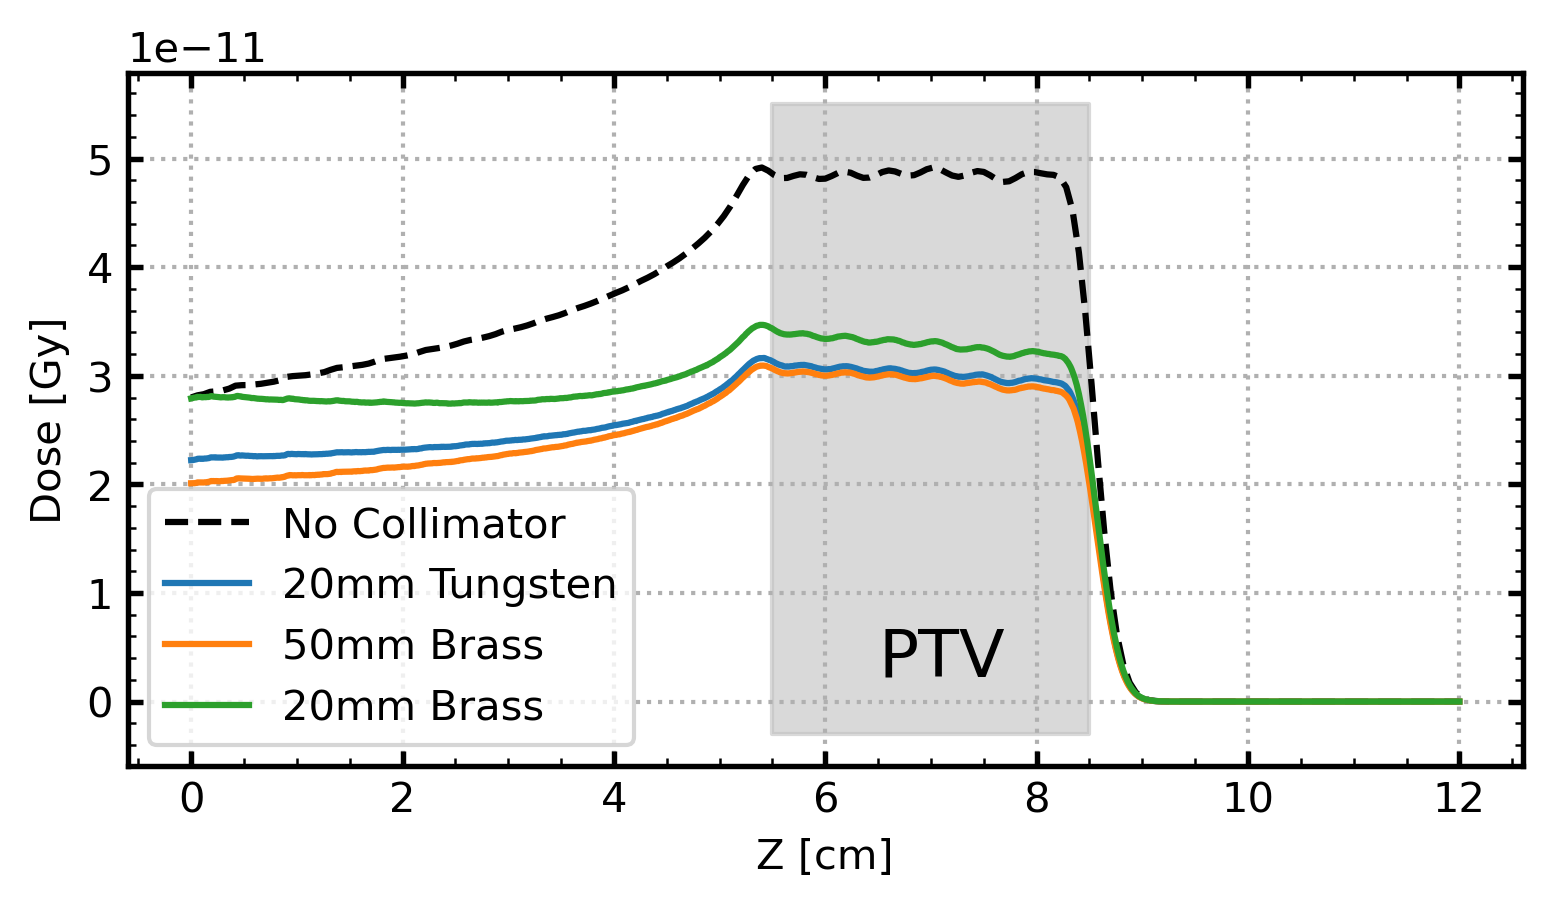

In [65]:
plt.rc("figure", figsize=(6,3), dpi=300)

plot_onedim(treatmentplan_no_grid[3],
            extra_paths=[tungsten1p27_data[1], treatmentplan_grid[1], brass20_1p25_data[1]],
           labels=["No Collimator", "20mm Tungsten", "50mm Brass", "20mm Brass"])
plt.fill_betweenx([-0.3e-11, 5.5e-11], 5.5, 8.5, alpha=0.6, color="silver")
plt.text(6.5, 0.7e-11, "PTV", fontsize=16, verticalalignment='top')
plt.xlabel("Z [cm]")
plt.ylabel("Dose [Gy]") # to go from GeV/g to Gy multiply y-vales with 1.602176462E-7plt.show()  
#plt.ylim([-0.2e-11, 5.1e-11])
plt.show() # x[-5,5], y[-1.25,0.75]

In [19]:
def data(path, dims, data_return=False):
    df = load_dat_file(path, dims)
    data = pd.pivot_table(df, index=dims[1], columns=dims[0], values="Unc")
    if data_return:
        return data
    return df

In [20]:
brass20_data = data(brass20_1p25_data[6], ["Z", "X"])
tungsten20_data = data(tungsten1p27_data[6], ["Z", "X"])
brass50_data = data(treatmentplan_grid[6], ["Z", "X"])
tot_df = pd.concat([brass20_data, tungsten20_data], join="inner")
tot_df = pd.concat([tot_df, brass50_data], join="inner")

In [21]:
z_max = tot_df["Z"].max()
z_min = tot_df["Z"].min()
x_max = tot_df["X"].max()
x_min = tot_df["X"].min()

In [22]:
def groupy(test):
    new_sums = np.linspace(test.index.min(), test.index.max(), 41)
    df = pd.DataFrame(columns=test.columns, index=new_sums)
    for i in new_sums:
        df.loc[i:i+0.4] = test.loc[(test.index <= i) & (test.index > i-df.index.max()/41)]
    return df

In [23]:
datas = [
    data(tungsten1p27_data[6], ["Z", "X"], data_return=True),
    data(brass20_1p25_data[6], ["Z", "X"], data_return=True),
    data(treatmentplan_grid[6], ["Z", "X"], data_return=True)
]

In [24]:
datas[0].index = datas[0].index-24
datas[1].index = datas[1].index
datas[2].index = datas[2].index+24

full_df = pd.DataFrame(index=np.arange(-36, 36.05, 0.05) ,columns=datas[2].columns)

In [25]:
for i in range(0,3):
    full_df.loc[datas[i].index.min()-0.01:datas[i].index.max(),
                datas[i].columns.min():datas[i].columns.max()] = datas[i].values

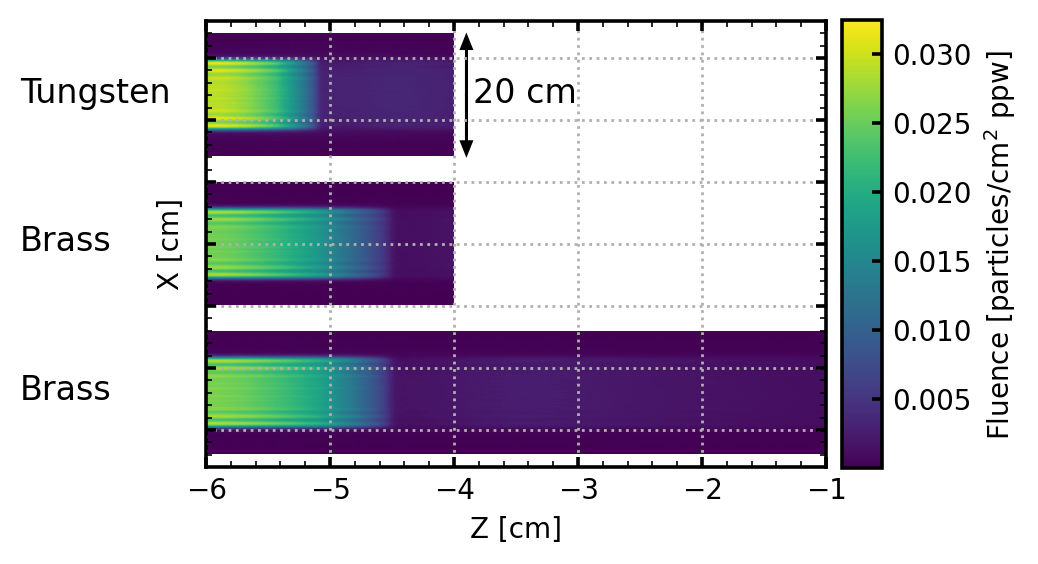

In [44]:
data = full_df.astype("float64")
dims = ["Z", "X"]
fig, ax = plt.subplots(figsize=(4,8), dpi=200)
im = ax.imshow(data, extent=[full_df.columns[0], full_df.columns[-1],
                                 full_df.index[0], full_df.index[-1].round(0)])
ax.set_xlabel("Z [cm]")
ax.set_ylabel("X [cm]")
ax.set_aspect(1/20)

ax.set_yticklabels([])
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

cax = fig.add_axes([0.92, 0.355, 0.05, 0.28])
ax.arrow(-3.9, 24, 0, 9.5, length_includes_head=True, head_length=2, head_width=0.08, color='black')
ax.arrow(-3.9, 24, 0, -9.5, length_includes_head=True, head_length=2, head_width=0.08, color='black')
#ax.annotate(text=" ", xy=(-3.9,14), xytext=(-3.9,34), arrowprops=dict(arrowstyle='<->'))
ax.text(-3.85, 27, "20 cm", fontsize=12, verticalalignment='top')
ax.text(-7.5, 27, "Tungsten", fontsize=12, verticalalignment='top')
ax.text(-7.5, 3, "Brass", fontsize=12, verticalalignment='top')
ax.text(-7.5, -21, "Brass", fontsize=12, verticalalignment='top')


fig.colorbar(im, cax=cax)
plt.ylabel(r"Fluence [particles/cm$^2$ ppw] ") # ppw: per unit primary weight
plt.show()

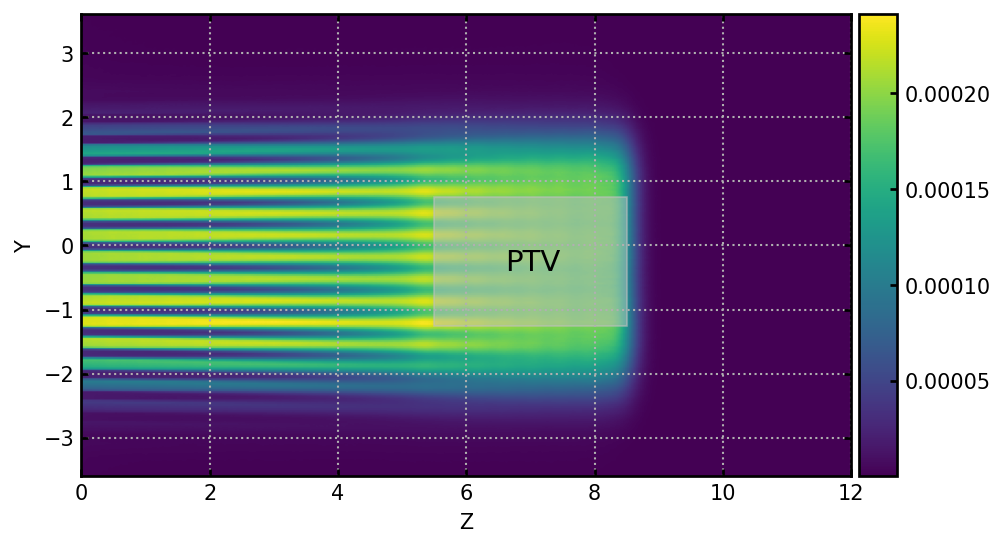

In [36]:
plotter_treat(tungsten1p27_data[4], ["Z", "Y"], swap_dims=True, 
              ptvplace=[6.6 , -0.05], fills=[[-1.25, 0.75], 5.5, 8.5], ylim=[-3.6, 3.6]) # X[-10,10]
plt.show()

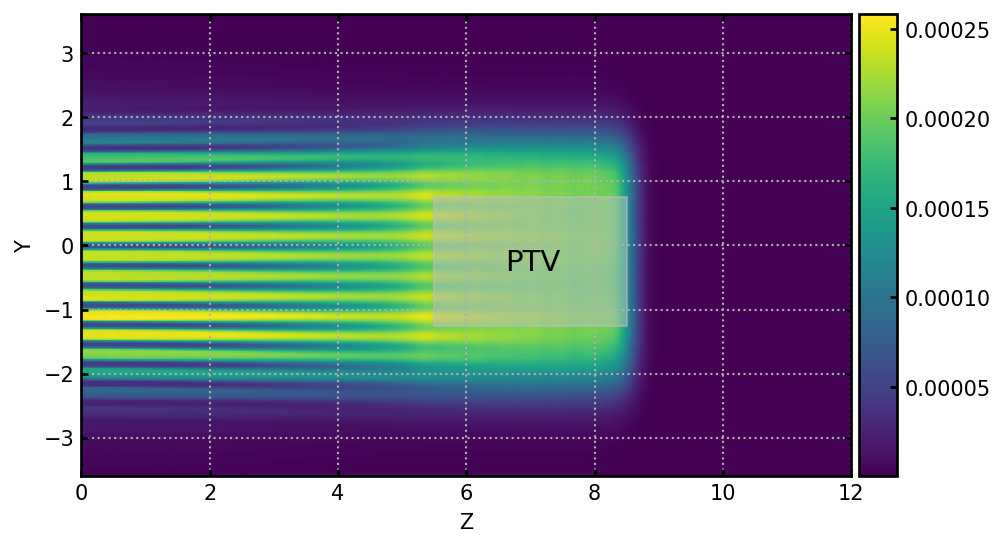

In [41]:
plotter_treat(brass20_1p25_data[4], ["Z", "Y"], swap_dims=True, ptvplace=[6.6 , -0.05],
             fills=[[-1.25, 0.75], 5.5, 8.5], ylim=[-3.6, 3.6]) # X[-10,10]
plt.show()

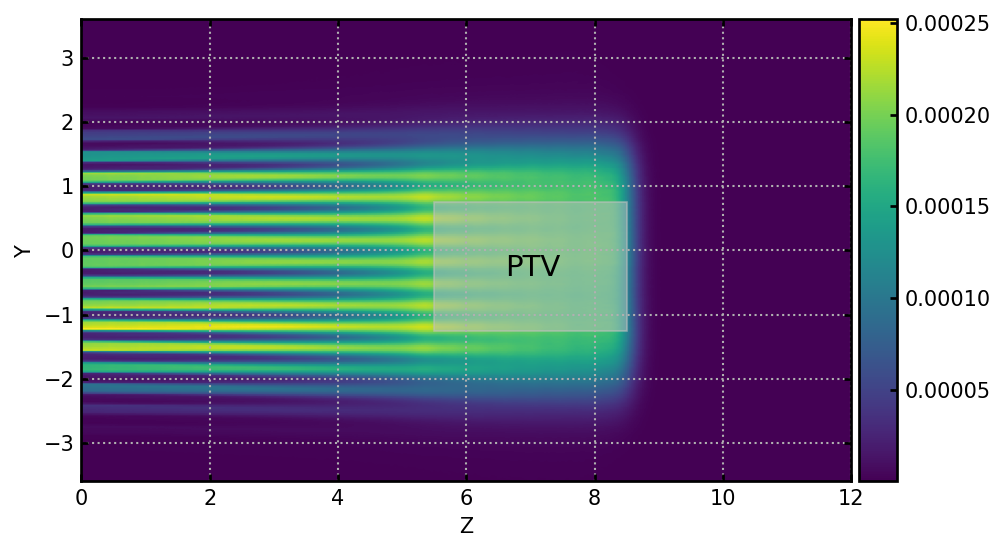

In [17]:
plotter_treat(treatmentplan_grid[4], ["Z", "Y"], swap_dims=True, ptvplace=[6.6 , -0.05],
             fills=[[-1.25, 0.75], 5.5, 8.5], ylim=[-3.6, 3.6]) # X[-10,10]
plt.show()

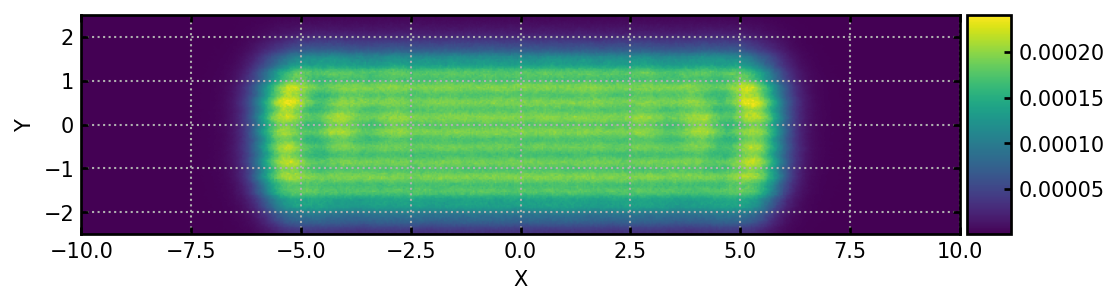

In [28]:
plotter_treat(treatmentplan_grid[5], ["X", "Y"], ylim=[-2.5,2.5]) # X[-10,10]
plotter_treat(treatmentplan_no_grid[4], ["X", "Y"]) # X[-10,10]
plt.show()

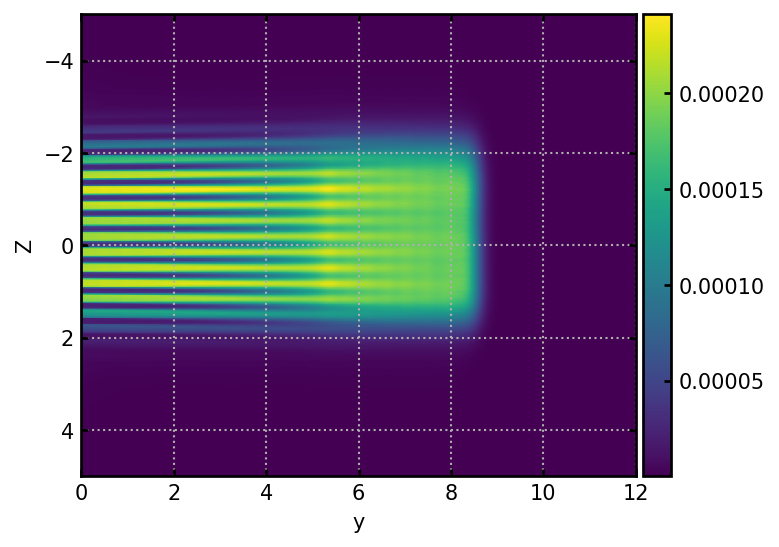

In [43]:
plotter_treat(tungsten1p27_data[4], ["y", "Z"], swap_dims=True) # X[-10,10]
plt.show()

# Treatment plan tungsten grid

In [40]:
plotter_treat([2], ["Y", "Z"]) # X[-10,10]
plt.show()

KeyError: 2

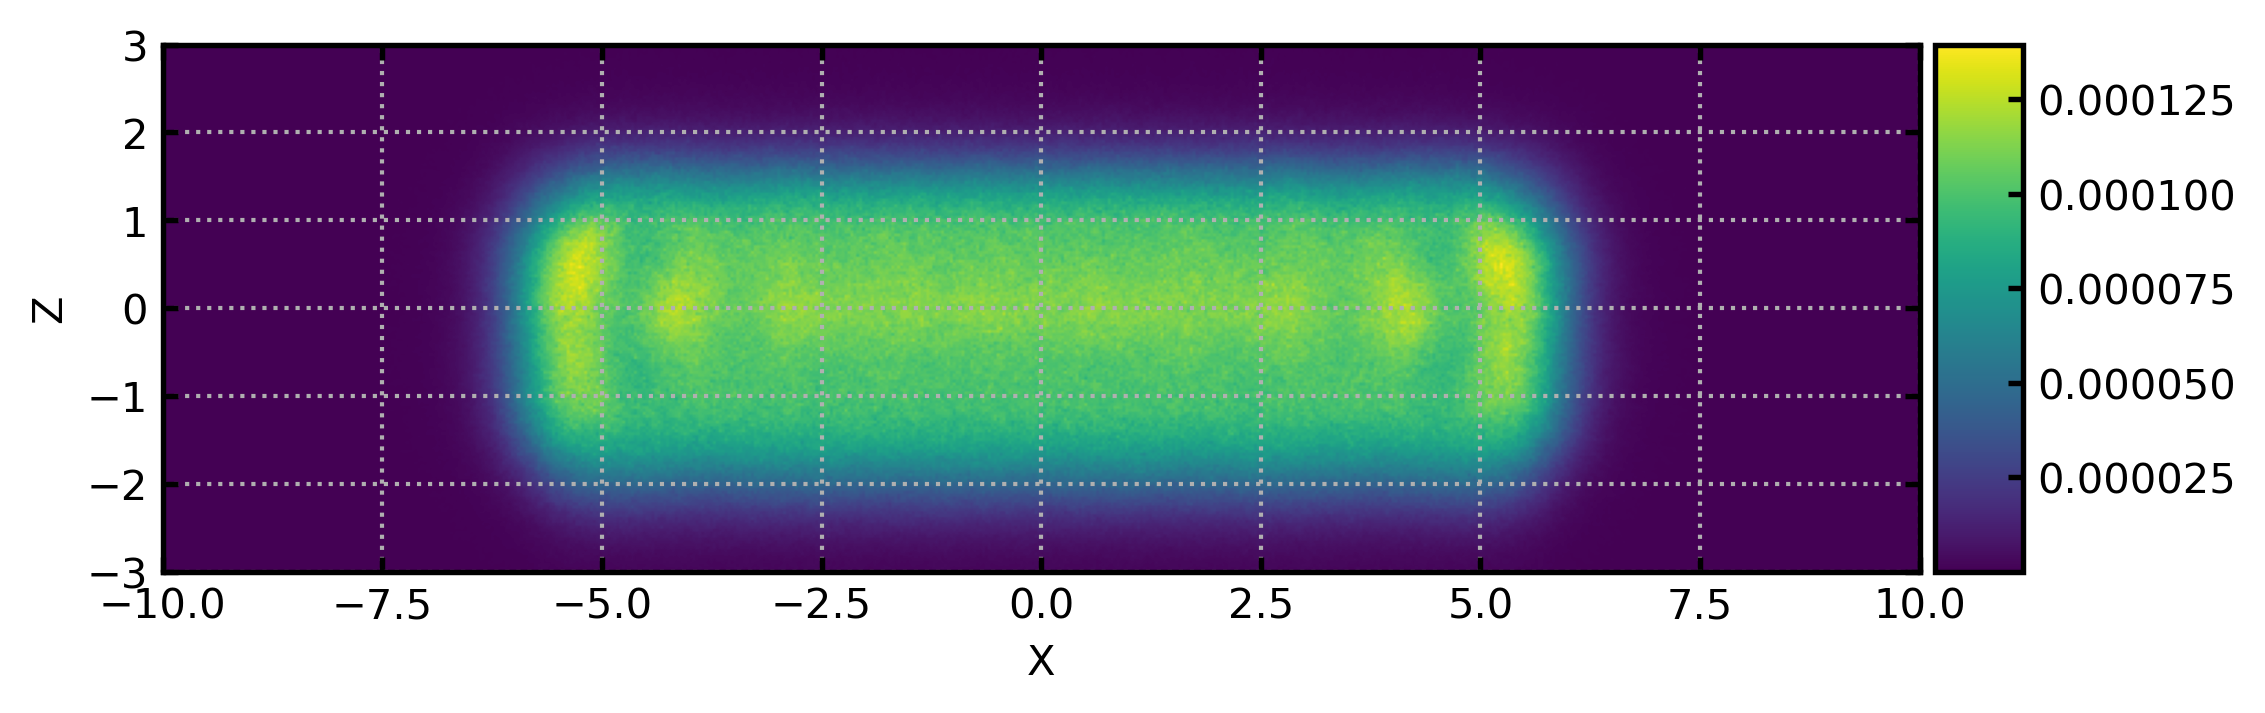

In [537]:
plotter_treat(treatmentplan_grid[5], ["X", "Z"], ylim=[-3,3]) # X[-10,10]
plt.show()

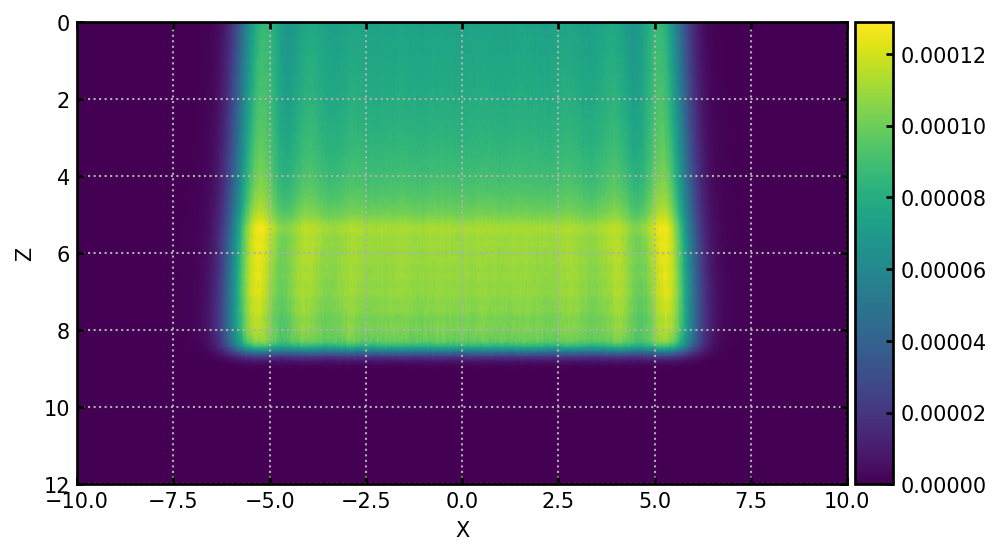

In [24]:
plotter_treat(treatmentplan_grid[3], ["X", "Z"])  # z[-1,0]
plt.show()

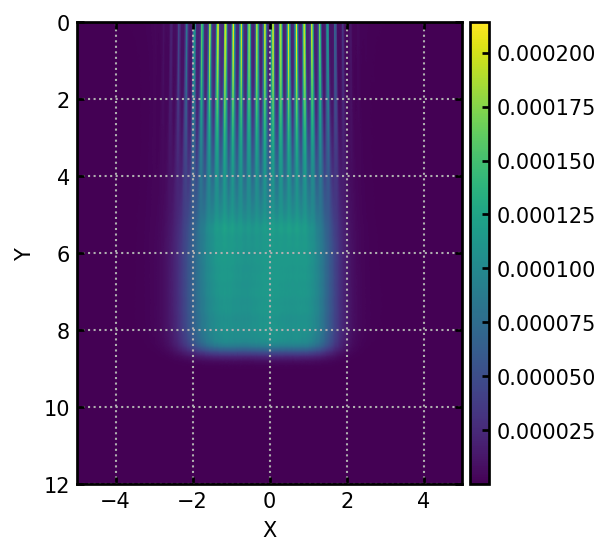

In [101]:
plotter_treat(tungsten1p27_data[4], ["X", "Y"])#, ptvplace=[-0.6,-0.4], fills=[[-1.25,0.75], -5, 5]) 
# Z[6,8] IN PTV
plt.show()

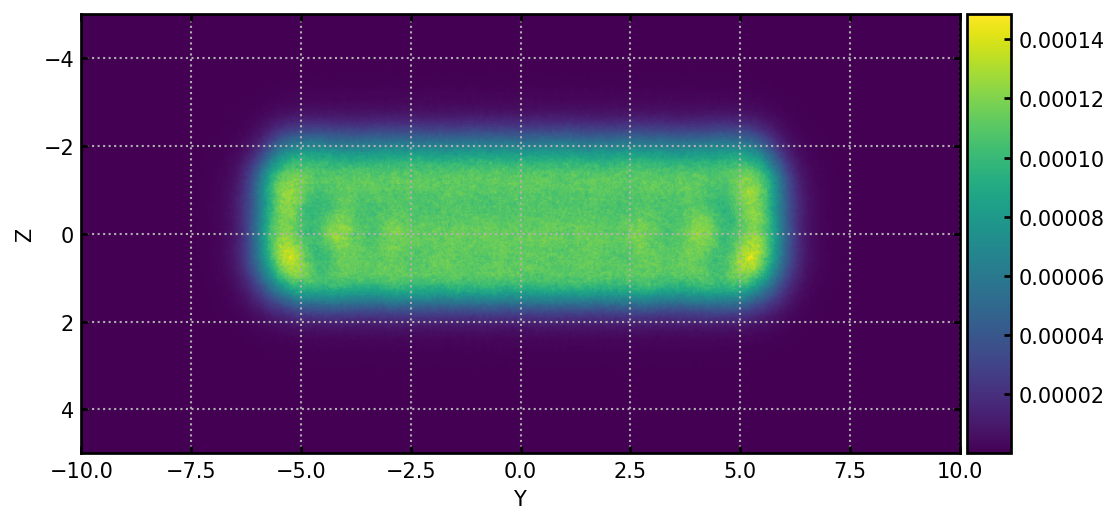

In [27]:
plotter_treat(tungsten1p27_data[5], ["Y", "Z"]) # X[-10,10]
plt.show()

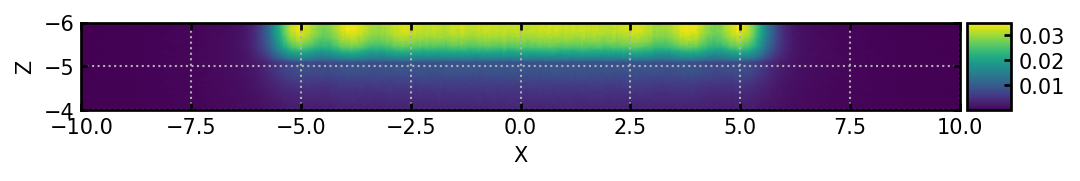

In [29]:
plotter_treat(tungsten1p27_data[6], ["X", "Z"]) # Y[-5,5]
plt.show()

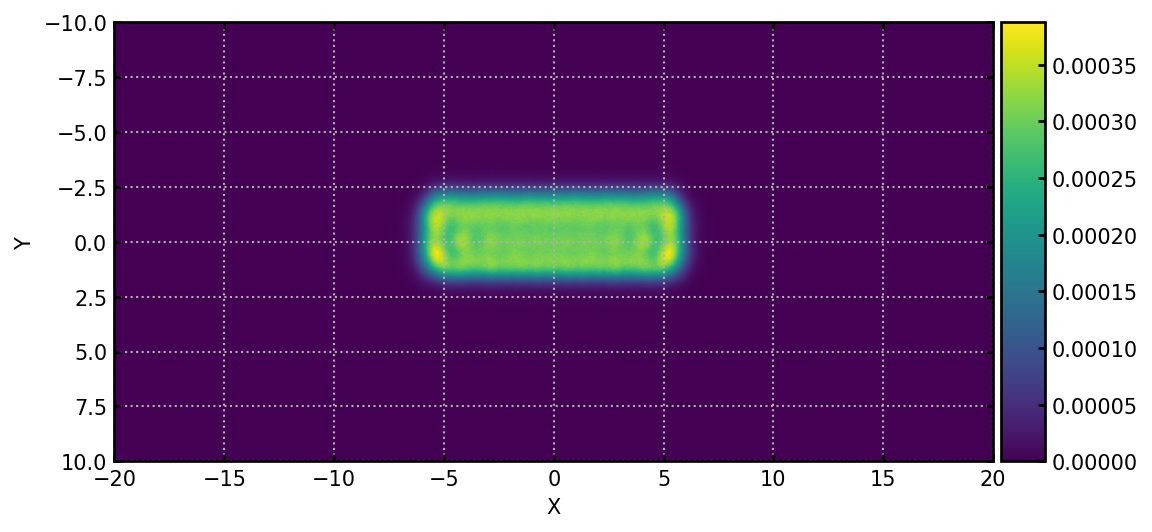

In [30]:
plotter_treat(treatmentplan_no_grid[0], ["X", "Y"])
plt.show()

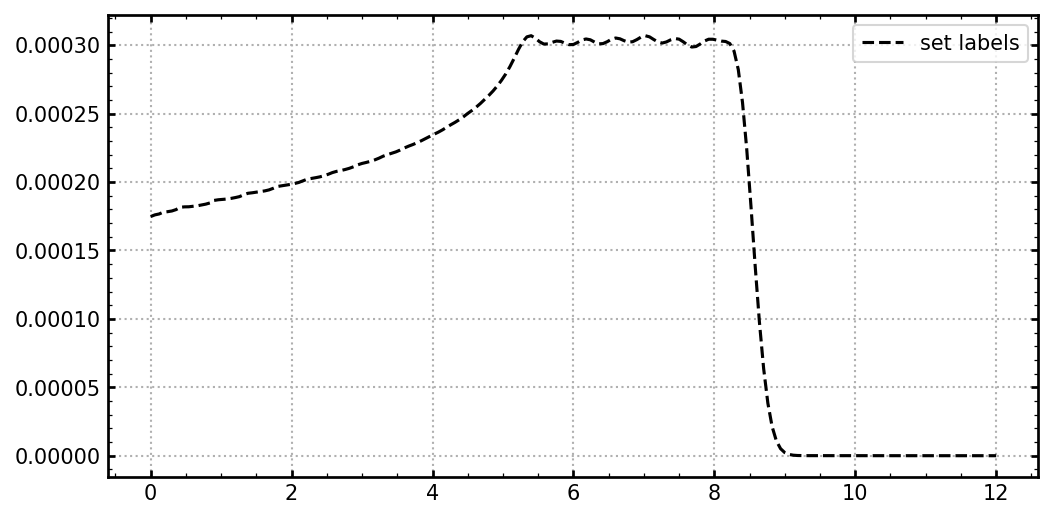

In [13]:
plot_onedim(treatmentplan_no_grid[3])
plt.show()

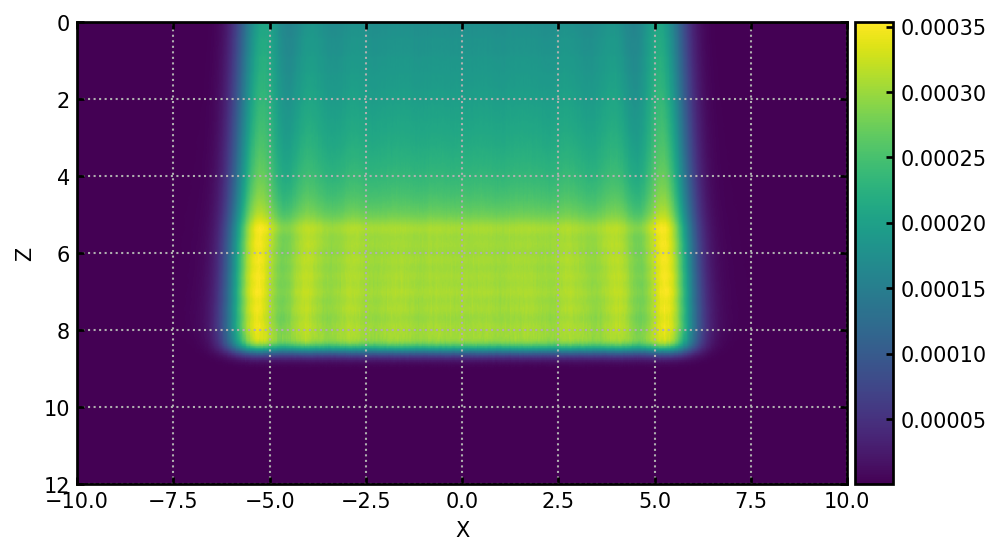

In [32]:
plotter_treat(treatmentplan_no_grid[1], ["X", "Z"], swap_dims=False)
plt.show()

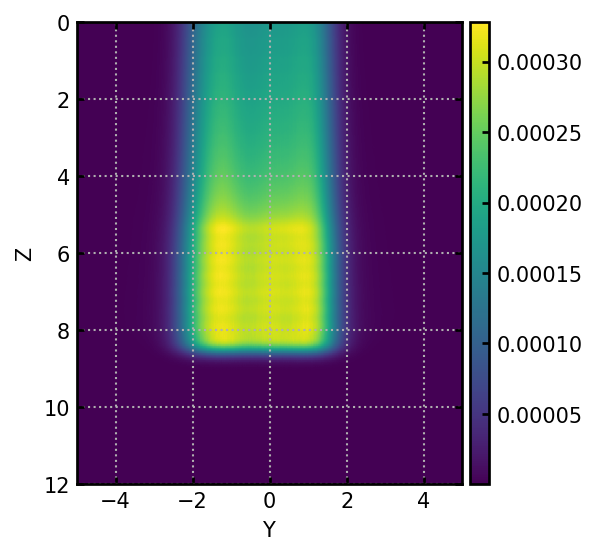

In [33]:
plotter_treat(treatmentplan_no_grid[2], ["Y", "Z"], swap_dims=False)
plt.show()

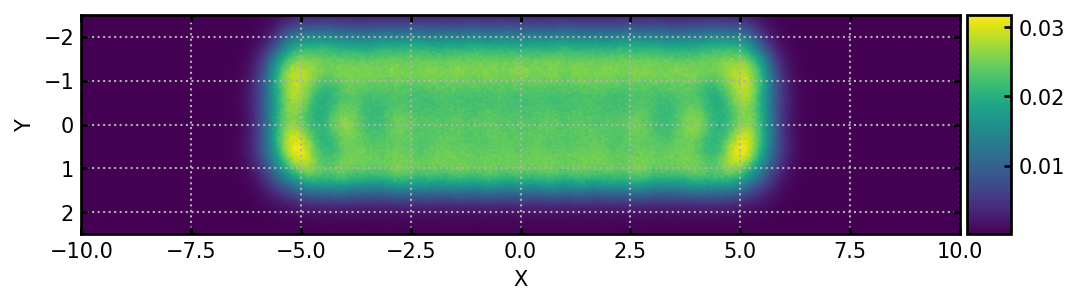

In [34]:
plotter_treat(treatmentplan_no_grid[4], ["X", "Y"], swap_dims=False)
plt.show()

# Grid On (50brass1p25mm)

In [35]:
plotter_treat(treatmentplan_grid[0], ["X", "Y"], swap_dims=False) # in the leaf z: [-6:-1]
plt.show()

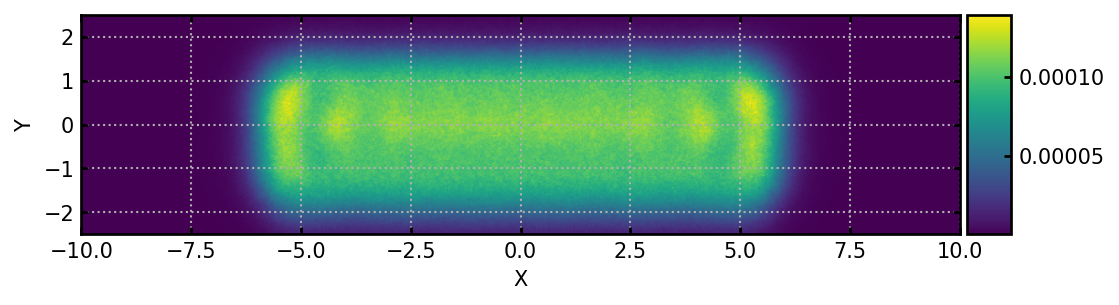

In [40]:
plotter_treat(treatmentplan_grid[5], ["X", "Y"], swap_dims=False, ylim=[-2.5, 2.5], xlim=[-10,10]) 
# in water z: [1:12]
plt.show()

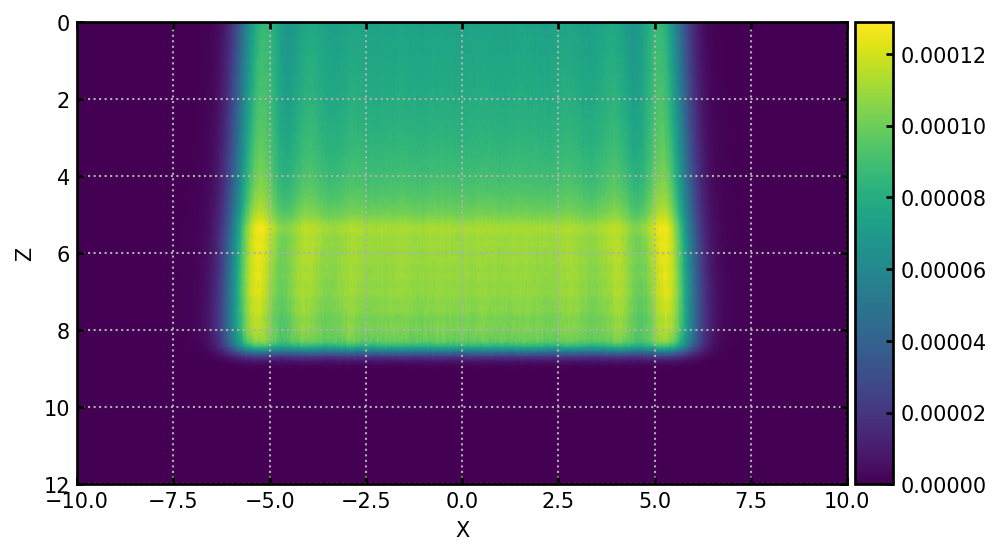

In [41]:
plotter_treat(treatmentplan_grid[3], ["X", "Z"]) # in water y: [-10:10]
plt.show()

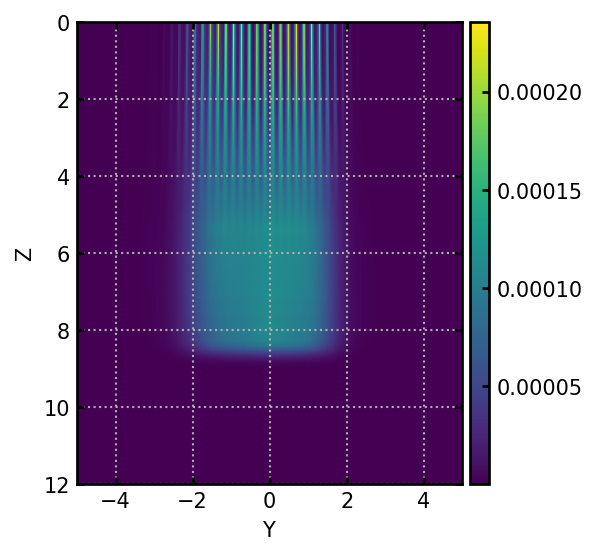

In [42]:
plotter_treat(treatmentplan_grid[4], ["Y", "Z"], swap_dims=False) # in water x: [-20:20]
plt.show()

# 20Brass1p25mm simulation results 

In [240]:
brass = get_tot_df(brass20_1p25_paths[:20]).reset_index()
b = brass.loc[brass["Bq"] > brass.describe()["Bq"].loc["25%"]].copy()
b["Half life"] = [catch(A, Z) for A, Z in zip(b["A"], b["Z"])]
b["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(b["A"], b["Z"])]

In [241]:
# Compare with experimental results
b.loc[(b["A"].isin(["56", "18", "22", "56", "68", "60", "89", "103"])) &
      (b["Z"].isin([27, 18, 9, 11, 25, 31, 40, 44]))].rename(columns={"Bq": "Bq/V"})

A   Z          Bq/V            +- Half life decay modes
12   68  31  4.434611e+08  1.279799e+06   67.71 m     β+ & EC
20   56  25  4.382104e+07  2.784513e+05  2.5789 h          β-
29   18   9  1.098945e+07  9.925164e+04  109.77 m     β+ & EC
45   56  27  1.875300e+06  2.516057e+03   77.23 d     β+ & EC
74   60  27  3.476000e+04  7.888277e+01  5.2713 y          β-
108  22  11  2.520000e+01  3.690854e+00  2.6019 y     β+ & EC
120  22   9  1.530000e-06  1.514700e-06   No Data     No Data

In [242]:
b[:15].rename(columns={"Bq": "Bq/V"})  # TOP 15

A   Z          Bq/V            +- Half life decay modes
0   62  29  4.579688e+10  3.940673e+07   9.673 m     β+ & EC
1   15   8  2.705933e+10  1.757206e+07  122.24 s     β+ & EC
2   11   6  1.185739e+10  9.097379e+06   20.39 m     β+ & EC
3   63  30  8.596267e+09  8.968871e+06   38.47 m     β+ & EC
4   61  29  4.709188e+09  3.963183e+06   3.333 h     β+ & EC
5   13   7  4.049280e+09  5.229354e+06   9.965 m     β+ & EC
6   60  29  2.755812e+09  3.704746e+06    23.7 m     β+ & EC
7   64  29  1.115898e+09  1.106679e+06  12.700 h     β+ & EC
8   65  31  9.732626e+08  6.256634e+06    15.2 m     β+ & EC
9   64  31  9.694361e+08  6.908828e+06   2.627 m     β+ & EC
10  66  29  8.573909e+08  6.733411e+06   5.120 m          β-
11  62  30  4.926128e+08  7.513731e+05   9.186 h     β+ & EC
12  68  31  4.434611e+08  1.279799e+06   67.71 m     β+ & EC
13  14   8  2.471219e+08  3.531671e+06  70.606 s     β+ & EC
14  61  30  2.349068e+08  1.886542e+06    89.1 s     β+ & EC

# 50Brass1p27mm simulation results 

In [243]:
nbrass = get_tot_df(treatmentplan_grid_air_lis, number=5).reset_index()
k = nbrass.loc[nbrass["Bq"] > nbrass.describe()["Bq"].loc["25%"]].copy()
k["Half life"] = [catch(A, Z) for A, Z in zip(k["A"], k["Z"])]
k["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(k["A"], k["Z"])]

In [244]:
pd.set_option("display.precision", 1)
k[:15].rename(columns={"Bq": "Bq/V"})  # TOP 15

A   Z     Bq/V       +- Half life decay modes
0   62  29  2.3e+10  9.8e+06   9.673 m     β+ & EC
1   63  30  4.3e+09  7.5e+06   38.47 m     β+ & EC
2   61  29  2.3e+09  3.2e+06   3.333 h     β+ & EC
3   60  29  1.3e+09  3.4e+06    23.7 m     β+ & EC
4   64  29  5.5e+08  5.5e+05  12.700 h     β+ & EC
5   65  31  5.0e+08  4.2e+06    15.2 m     β+ & EC
6   64  31  5.0e+08  7.1e+06   2.627 m     β+ & EC
7   66  29  3.5e+08  4.3e+06   5.120 m          β-
8   62  30  2.4e+08  8.5e+05   9.186 h     β+ & EC
9   68  31  2.4e+08  9.2e+05   67.71 m     β+ & EC
10  61  30  1.1e+08  1.8e+06    89.1 s     β+ & EC
11  66  31  1.1e+08  2.7e+05    9.49 h     β+ & EC
12  59  29  7.8e+07  1.5e+06    81.5 s     β+ & EC
13  61  27  6.7e+07  3.7e+05   1.650 h          β-
14  53  26  5.9e+07  8.8e+05    8.51 m     β+ & EC

In [247]:
nbrass = get_tot_df(treatmentplan_grid_lis[:20], number=6).reset_index()
k = nbrass.loc[nbrass["Bq"] > nbrass.describe()["Bq"].loc["25%"]].copy()
k["Half life"] = [catch(A, Z) for A, Z in zip(k["A"], k["Z"])]
k["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(k["A"], k["Z"])]

In [248]:
pd.set_option("display.precision", 1)
k[:15].rename(columns={"Bq": "Bq/V"})  # TOP 15

A   Z     Bq/V       +- Half life decay modes
0   62  29  2.2e+10  1.9e+07   9.673 m     β+ & EC
1   15   8  8.7e+09  1.1e+07  122.24 s     β+ & EC
2   63  30  4.2e+09  4.4e+06   38.47 m     β+ & EC
3   11   6  3.9e+09  3.0e+06   20.39 m     β+ & EC
4   61  29  2.2e+09  6.1e+05   3.333 h     β+ & EC
5   13   7  1.4e+09  2.3e+06   9.965 m     β+ & EC
6   60  29  1.2e+09  3.7e+06    23.7 m     β+ & EC
7   64  29  6.1e+08  4.5e+05  12.700 h     β+ & EC
8   66  29  5.8e+08  3.7e+06   5.120 m          β-
9   65  31  4.8e+08  2.9e+06    15.2 m     β+ & EC
10  64  31  4.8e+08  2.8e+06   2.627 m     β+ & EC
11  62  30  2.3e+08  1.8e+05   9.186 h     β+ & EC
12  68  31  2.3e+08  2.2e+05   67.71 m     β+ & EC
13  61  30  1.1e+08  1.2e+06    89.1 s     β+ & EC
14  66  31  1.0e+08  1.6e+05    9.49 h     β+ & EC

In [249]:
nbrass = get_tot_df(nbrass1p27_paths).reset_index()
k = nbrass.loc[nbrass["Bq"] > nbrass.describe()["Bq"].loc["25%"]].copy()

In [250]:
k["Half life"] = [catch(A, Z) for A, Z in zip(k["A"], k["Z"])]
k["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(k["A"], k["Z"])]

In [251]:
# Compare with experimental results
k.loc[(k["A"].isin(["56", "41", "18", "22", "56", "68", "60"])) &
      (k["Z"].isin([27, 18, 9, 11, 25, 31]))].rename(columns={"Bq": "Bq/V"})

A   Z     Bq/V       +- Half life decay modes
10  68  31  5.4e+02  4.7e+00   67.71 m     β+ & EC
20  56  25  4.1e+01  1.2e+00  2.5789 h          β-
37  18   9  4.5e+00  3.2e-01  109.77 m     β+ & EC
46  56  27  1.9e+00  2.1e-03   77.23 d     β+ & EC
63  41  18  2.2e-01  6.4e-02  109.61 m          β-
77  60  27  4.1e-02  7.5e-05  5.2713 y          β-
93  22  11  4.1e-05  9.1e-06  2.6019 y     β+ & EC

In [252]:
pd.set_option("display.precision", 1)
k[:15].rename(columns={"Bq": "Bq/V"})  # TOP 15

A   Z     Bq/V    +- Half life decay modes
0   62  29  37997.0  32.6   9.673 m     β+ & EC
1   11   6  20122.0  69.5   20.39 m     β+ & EC
2   13   7  18614.2  32.1   9.965 m     β+ & EC
3   63  30   9100.5  15.8   38.47 m     β+ & EC
4   61  29   5041.1   7.1   3.333 h     β+ & EC
5   15   8   4234.4   8.3  122.24 s     β+ & EC
6   60  29   2606.5  21.5    23.7 m     β+ & EC
7   64  29   1263.4   2.2  12.700 h     β+ & EC
8   65  31    951.0   6.5    15.2 m     β+ & EC
9   62  30    546.2   1.9   9.186 h     β+ & EC
10  68  31    537.5   4.7   67.71 m     β+ & EC
11  64  31    508.6   9.1   2.627 m     β+ & EC
12  66  29    450.1   6.0   5.120 m          β-
13  66  31    242.1   0.9    9.49 h     β+ & EC
14  14   8    196.8   1.6  70.606 s     β+ & EC

# Comapare 20Tungsten1p27mm simulation results water and air


In [ ]:
tungsten_nothing = final_df(tungsten1p27_nothing)

In [ ]:
tungsten_air_water = final_df(tungsten1p27_paths)
tungsten_vacuum_water = final_df(tungsten1p27_vacuum_water)

In [ ]:
top = 15
t_n = tungsten_nothing.head(top)
t_v_w = tungsten_vacuum_water.head(top)
t_a_w = tungsten_air_water.head(top)

In [ ]:
nothing = ("(" + t_n["A"] + "," + t_n["Z"].astype(str) + ")").tolist()
water_vacuum = ("(" + t_v_w["A"] + "," + t_v_w["Z"].astype(str) + ")").tolist()
air_water = ("(" + t_a_w["A"] + "," + t_a_w["Z"].astype(str) + ")").tolist()

In [ ]:
len(nothing), len(water_vacuum), len(air_water)

In [ ]:
[i for i in air_water if i not in water_vacuum]

In [ ]:
[i for i in water_vacuum if i not in nothing]

In [ ]:
[i for i in air_water if i not in nothing]

# test

In [597]:
def get_final_results(lis_paths, numb, dat_path, head=20):
    tungsten = get_tot_df(lis_paths[20:], number=numb, other=True).reset_index()
    t1 = tungsten.loc[tungsten["Bq"] > tungsten.describe()["Bq"].loc["50%"]].copy()
    tungsten = get_tot_df(lis_paths[:20], number=numb).reset_index()
    t2 = tungsten.loc[tungsten["Bq"] > tungsten.describe()["Bq"].loc["50%"]].copy()
    t2["Bq"] = t2["Bq"]/get_gy_value(dat_path)
    t2 = t2.rename(columns={"Bq": r"Bq/(V$\cdot$Gy)"})
    leaf = ("(" + t1["A"] + "," + t1["Z"].astype(str) + ")").tolist()
    tot_leafs = ("(" + t2["A"] + "," + t2["Z"].astype(str) + ")").tolist()
    tester = t1.head(head)
    As = tester["A"].values
    Zs = tester["Z"].values
    df1 = t2.loc[(t2["A"]==As[0]) & (t2["Z"]==Zs[0])].copy()
    for A, Z in zip(As[1:], Zs[1:]):
        df1 = pd.concat([df1, t2.loc[(t2["A"]==A) & (t2["Z"]==Z)]], join="inner")
    finalbrass = df1.sort_values(by=r"Bq/(V$\cdot$Gy)", ascending=False).reset_index(drop=True)  
    finalbrass["Half life"] = [catch(A, Z) for A, Z in zip(finalbrass["A"], finalbrass["Z"])]
    finalbrass["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(finalbrass["A"], finalbrass["Z"])]
    finalbrass["+-"] = finalbrass["+-"].values/get_gy_value(dat_path)
    finalbrass.index = finalbrass.index + 1
    return finalbrass


In [599]:
final50brass=get_final_results(lis_paths=treatmentplan_grid_lis, numb=6, dat_path=treatmentplan_grid[1], head=20)

In [600]:
finaltungsten=get_final_results(lis_paths=tungsten1p27_paths, numb=3, dat_path=tungsten1p27_data[1], head=20)

In [601]:
final20brass=get_final_results(lis_paths=brass20_1p25_paths, numb=3, dat_path=brass20_1p25_data[1], head=20)

In [613]:
final50brass.loc[:,[r"Bq/(V$\cdot$Gy)", "+-"]].head(10)

+-
1   1.1e+18
2   2.6e+17
3   3.7e+16
4   2.2e+17
5   2.7e+16
6   2.2e+17
7   1.7e+17
8   1.7e+17
9   1.1e+16
10  1.3e+16

In [614]:
finaltungsten.loc[:,[r"Bq/(V$\cdot$Gy)", "+-"]].head(10)

Bq/(V$\cdot$Gy)       +-
1           1.4e+21  1.6e+18
2           1.2e+21  7.5e+17
3           1.1e+21  4.7e+17
4           1.0e+21  6.3e+17
5           9.6e+20  1.2e+18
6           5.4e+20  7.9e+17
7           3.0e+20  1.8e+17
8           2.9e+20  4.1e+17
9           2.1e+20  1.5e+17
10          1.8e+20  1.5e+17

In [616]:
final20brass.head(10)

A   Z  Bq/(V$\cdot$Gy)       +- Half life decay modes
1   62  29          2.5e+21  2.1e+18   9.673 m     β+ & EC
2   63  30          4.7e+20  4.9e+17   38.47 m     β+ & EC
3   61  29          2.6e+20  2.2e+17   3.333 h     β+ & EC
4   60  29          1.5e+20  2.0e+17    23.7 m     β+ & EC
5   64  29          6.1e+19  6.0e+16  12.700 h     β+ & EC
6   65  31          5.3e+19  3.4e+17    15.2 m     β+ & EC
7   64  31          5.3e+19  3.8e+17   2.627 m     β+ & EC
8   66  29          4.7e+19  3.7e+17   5.120 m          β-
9   62  30          2.7e+19  4.1e+16   9.186 h     β+ & EC
10  68  31          2.4e+19  7.0e+16   67.71 m     β+ & EC

In [635]:
test20brass=get_final_results(lis_paths=treatmentplan_grid_lis, numb=6, dat_path=treatmentplan_grid[1], head=500)

In [645]:
tungsten = get_tot_df(treatmentplan_grid_lis[:20], number=6, other=True).reset_index()
tungsten = tungsten.loc[tungsten["Bq"] > tungsten.describe()["Bq"].loc["50%"]]
tungsten["Bq"] = tungsten["Bq"]/get_gy_value(tungsten1p27_data[1])
tungsten["+-"] = tungsten["+-"]/get_gy_value(tungsten1p27_data[1])

KeyError: 'cool-29'

In [644]:
tungsten.loc[tungsten["A"] == "41"]

Empty DataFrame
Columns: [A, Z, Bq, +-]
Index: []

In [637]:
As = ["56", "89", "103", "40", "18", "41"]  # 20 brass and 50 brass
Zs = [27, 40, 44, 19, 9, 18]
#As = ["7", "18", "40", "68", "84", "87", "88", "97", "125", "126", "139", "139",
#   "183", "211", "214", "219", "226", "235"  ]
#Zs = [4, 9, 19, 31, 35, 36, 36, 41, 54, 53, 56, 58, 75, 83, 83, 86, 88, 92]
df1 = test20brass.loc[(test20brass["A"]==As[0]) & (test20brass["Z"]==Zs[0])].copy()
for A, Z in zip(As[1:], Zs[1:]):
    df1 = pd.concat([df1, test20brass.loc[(test20brass["A"]==A) & (test20brass["Z"]==Z)]], join="inner")

In [638]:
df1.sort_index()

A   Z  Bq/(V$\cdot$Gy)       +- Half life decay modes
41  56  27          4.9e+16  6.6e+13   77.23 d     β+ & EC
73  40  19          6.7e+03  4.7e+02  1.251 By          β-

In [ ]:
df1["+-"]*1e5

# 20Tungsten1p27mm simulation results 


In [ ]:
tungsten = get_tot_df(tungsten1p27_nothing).reset_index()
t = tungsten.loc[tungsten["Bq"] > tungsten.describe()["Bq"].loc["25%"]].copy()
t["Half life"] = [catch(A, Z) for A, Z in zip(t["A"], t["Z"])]
t["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(t["A"], t["Z"])]

In [ ]:
# Compare with experimental results
pd.set_option("display.precision", 2)
t.loc[(t["A"].isin(["84", "87", "88", "97", "7", "125", "126", "139","183", "211", "214", "219", "22", "68",
                    "18", "177"])) 
      &(t["Z"].isin([35, 36, 4, 41, 53, 54, 58, 56, 75, 83, 86, 11, 31, 9, 71]))].rename(columns={"Bq": "Bq/V"})

In [ ]:
pd.set_option("display.precision", 1)
t[:15].rename(columns={"Bq": "Bq/V"}) # Top 15

In [ ]:
tungsten = get_tot_df(tungsten1p27_paths).reset_index()
t = tungsten.loc[tungsten["Bq"] > tungsten.describe()["Bq"].loc["25%"]].copy()
t["Half life"] = [catch(A, Z) for A, Z in zip(t["A"], t["Z"])]

In [ ]:
t["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(t["A"], t["Z"])]

In [ ]:
# Compare with experimental results
pd.set_option("display.precision", 2)
t.loc[(t["A"].isin(["84", "87", "88", "97", "7", "125", "126", "139","183", "211", "214", "219", "22", "68",
                    "18", "177"])) 
      &(t["Z"].isin([35, 36, 4, 41, 53, 54, 58, 56, 75, 83, 86, 11, 31, 9, 71]))].rename(columns={"Bq": "Bq/V"})

In [ ]:
pd.set_option("display.precision", 1)
t[:15].rename(columns={"Bq": "Bq/V"}) # Top 15

## Possible braches tungsten

In [ ]:
exx = pd.DataFrame(columns=["A", "Z"])

In [ ]:
Z = [73]
A = ["172", "173", "174", "175", "176", "177", "178", "180", "182", "183", "184"]

In [ ]:

for a in A:
    exx = pd.concat([exx, pd.DataFrame([[a,73]], columns=exx.columns)], ignore_index=True)

In [ ]:
exx =exx.drop(columns="Half life")

In [ ]:
exx["Half life"] = [catch(A, Z, True) for A, Z in zip(exx["A"], exx["Z"])]

In [ ]:
exx.sort_values(by="Half life")

# Reliablity - Brass activation comparison

In [656]:
tbrass = get_tot_df(test_script, number=2).reset_index()
tb = tbrass.loc[tbrass["Bq"] > tbrass.describe()["Bq"].loc["25%"]].copy()
tb["Half life"] = [catch(A, Z) for A, Z in zip(tb["A"], tb["Z"])]

In [657]:
tb["decay modes"] = [catch_decay_type(A, Z) for A, Z in zip(tb["A"], tb["Z"])]

In [658]:
def locater(df, A, Z):
    d = pd.DataFrame(columns=["Bq"])
    for a, z in zip(A, Z):
        print(a,z)
        d = d.append(df.loc[(df["A"]==a) & (df["Z"]==b)].values[0]) 
    return d

In [659]:
As = ["62", "59", "58", "63", "66", "61", "60", "64","57", "63", "63", "61", "53"]
Zs = [29, 29,29,30,29,30,29,31,25,31,27,29,26]
len(As), len(Zs)

(13, 13)

In [660]:
tb.index = tb.index +1
df1 = tb.loc[(tb["A"]==As[0]) & (tb["Z"]==Zs[0])].copy()
for A, Z in zip(As[1:], Zs[1:]):
    df1 = pd.concat([df1, tb.loc[(tb["A"]==A) & (tb["Z"]==Z)]], join="inner")

In [672]:
df1["Half life"]

1      9.673 m
11      81.5 s
559    No Data
2      38.47 m
3      5.120 m
13      89.1 s
5       23.7 m
7      2.627 m
26      85.4 s
60     No Data
110    No Data
4      3.333 h
8       8.51 m
Name: Half life, dtype: object

In [389]:
tb[:15].rename(columns={"Bq": "Bq/V"})

A   Z     Bq/V       +- Half life decay modes
0    62  29  2.1e+08  90234.1   9.673 m     β+ & EC
1    63  30  2.9e+07  30309.4   38.47 m     β+ & EC
2    66  29  2.1e+07  60657.2   5.120 m          β-
3    61  29  1.6e+07   8842.7   3.333 h     β+ & EC
4    60  29  9.6e+06  14400.8    23.7 m     β+ & EC
5    64  29  8.8e+06   2193.5  12.700 h     β+ & EC
6    64  31  3.5e+06  26817.0   2.627 m     β+ & EC
7    53  26  3.1e+06  17536.4    8.51 m     β+ & EC
8    65  31  2.2e+06   6982.4    15.2 m     β+ & EC
9   197  82  2.1e+06   7494.1       8 m     β+ & EC
10   59  29  1.8e+06  20617.6    81.5 s     β+ & EC
11   69  30  1.7e+06   5395.3    56.4 m          β-
12   61  30  1.6e+06  24517.1    89.1 s     β+ & EC
13  196  82  1.4e+06   8452.8      37 m     β+ & EC
14   62  30  1.4e+06   1720.5   9.186 h     β+ & EC

In [348]:
df, uns = get_df_sum(treatmentplan_grid_lis[0],number=6)
df = sort_df(df)
df["Bq"] = df["Bq"]/get_gy_value(treatmentplan_grid[1])
df.sort_values(by="Bq", ascending=False)

A   Z       Bq
339   62  29  9.5e+17
1907  15   8  4.3e+17
1778  11   6  1.4e+17
404   63  30  1.2e+17
1843  13   7  5.8e+16
...   ..  ..      ...
781   19  13  0.0e+00
780   20  13  0.0e+00
779   21  13  0.0e+00
778   22  13  0.0e+00
1122  71  19  0.0e+00

[2244 rows x 3 columns]

In [67]:
ntimes_brass_27, nsums_brass_27, nunc_sums_brass_27 = get_val_unc(treatmentplan_grid_lis[:20],
                                                                  datapath=treatmentplan_grid[1], number=6)
tungsten_t, tungsten_sums_27, unc_tungsten_sums_27 = get_val_unc(tungsten1p27_paths[:20],
                                                                datapath=tungsten1p27_data[1])
ntimes_brass_25, nsums_brass_25, nunc_sums_brass_25 = get_val_unc(brass20_1p25_paths[:20],
                                                                 datapath=brass20_1p25_data[1])

In [68]:
tt_gy = get_gy_value(tungsten1p27_data[1]), 
b20_gy = get_gy_value(brass20_1p25_data[1]), 
b50_gy = get_gy_value(treatmentplan_grid[1])

In [69]:
tt_gy, b20_gy, b50_gy

((2.993683166839252e-11,), (3.2550700594326534e-11,), 2.930245335811311e-11)

In [70]:
ii =[1,4]
popt_tungsten_27, perr_tungsten_27 = fit_data(tungsten_sums_27[ii[0]:ii[1]], unc_tungsten_sums_27[ii[0]:ii[1]],
                                              guess=[1e19, 2.7e-3], prints=True, inteval=ii)
npopt_brass_27, nperr_brass_27 = fit_data(nsums_brass_27[ii[0]:ii[1]], nunc_sums_brass_27[ii[0]:ii[1]],
                                          guess=[1e19, 9e-5], prints=True, inteval=ii)
npopt_brass_25, nperr_brass_25 = fit_data(nsums_brass_25[ii[0]:ii[1]], nunc_sums_brass_25[ii[0]:ii[1]],
                                          guess=[1e19, 9e-5], prints=True, inteval=ii)

<ipython-input-63-88dc986a083f>:240: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-gamma*x) # no offset


a: 4.443931651209946e+20     gamma : 0.0003607341321710429
usikkerheder: [5.38432637e+17 3.11159500e-07]
halflife =  0.770034640487163  hours +- 0.0006642110412167297
a: 1.643752078217787e+20     gamma : 0.000540176260956879
usikkerheder: [2.18549387e+17 4.77243408e-07]
halflife =  0.5142354410127478  hours +- 0.00045432480490839117
a: 3.7045448482030826e+20     gamma : 0.0005217764515292158
usikkerheder: [4.59942519e+17 3.52019925e-07]
halflife =  0.5323693259127932  hours +- 0.00035916647791948866


In [71]:
np.array(nunc_sums_brass_27)/ np.array(nsums_brass_27)*100

array([0.05967419, 0.09605171, 0.13297195, 0.20860922, 0.26698858,
       0.22472386, 0.14112018, 0.12074572, 0.12046131, 0.23516515,
       0.07459984, 0.10080863, 0.11307218, 0.17148759, 0.25463222,
       0.31427096, 0.25246781, 0.17355054, 0.04442432, 0.08553119])

a: 700000000.0     gamma : 9e-05
usikkerheder: [inf inf]
halflife =  3.0864197530864197  hours +- inf


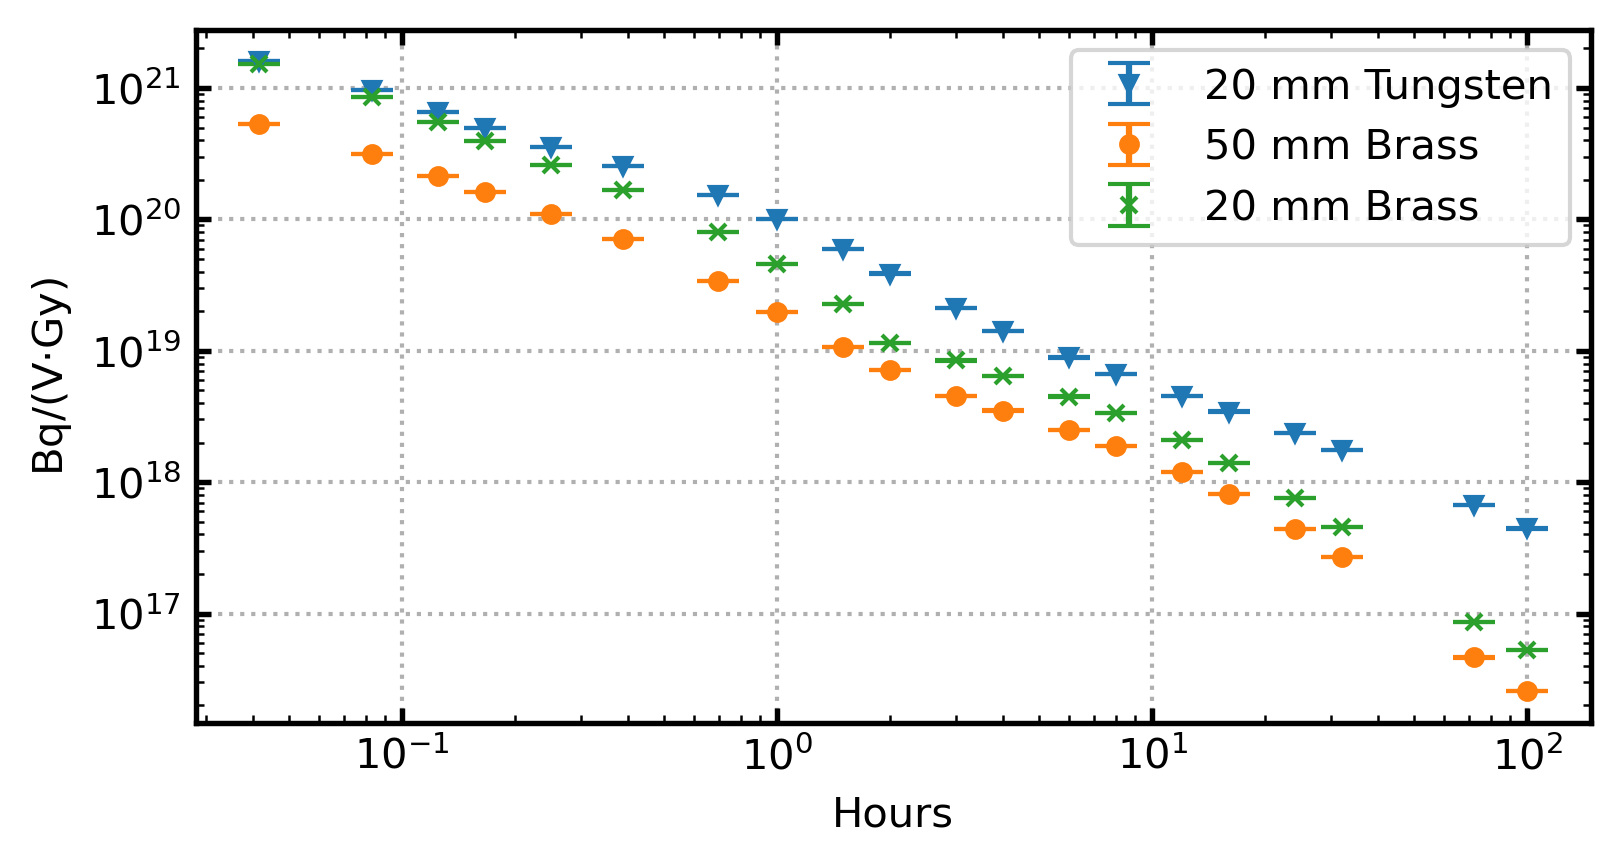

In [74]:
xs = np.linspace(100, 4e5, 20000)
plt.rc("figure", figsize=(6,3), dpi=300)
popt_tungsten_27, perr_tungsten_27 = fit_data(tungsten_sums_27, unc_tungsten_sums_27, prints=True)

add_plotx(xs, np.array(tungsten_sums_27),
          np.array(unc_tungsten_sums_27),
          popt_tungsten_27, perr_tungsten_27, "20 mm Tungsten", 'v', nofunc=False) 

add_plotx(xs, np.array(nsums_brass_27),
          np.array(nunc_sums_brass_27),
          npopt_brass_27, nperr_brass_27, "50 mm Brass", 'o', nofunc=False) 

add_plotx(xs, np.array(nsums_brass_25),
          np.array(nunc_sums_brass_25),
          npopt_brass_25, nperr_brass_25, "20 mm Brass", 'x', nofunc=False) 


#plt.title("Tot Bq/V all simulations")
plt.xlabel("Hours")
plt.ylabel(r"Bq/(V$\cdot$Gy)")
plt.yscale("log")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.show()

In [ ]:

xs = np.linspace(100, 4e5, 20000)
plt.rc("figure", figsize=(10,8), dpi=150)


popt_tungsten_27, perr_tungsten_27 = fit_data(tungsten_sums_27, unc_tungsten_sums_27, prints=True)
npopt_brass_27, nperr_brass_27 = fit_data(nsums_brass_27, nunc_sums_brass_27, guess=[0.5, 9e-10], prints=True)
npopt_brass_25, nperr_brass_25 = fit_data(nsums_brass_25, nunc_sums_brass_25, guess=[0.5, 9e-10], prints=True)


add_plotx(xs, tungsten_sums_27, unc_tungsten_sums_27, popt_tungsten_27, perr_tungsten_27, "tungsten1p27"
          , 'v', nofunc=False) 
add_plotx(xs, np.array(nsums_brass_27)*5/2
          , nunc_sums_brass_27, npopt_brass_27, nperr_brass_27, "brass50_1p27", nofunc=False) 
add_plotx(xs, np.array(nsums_brass_25)
          , nunc_sums_brass_25, npopt_brass_25, nperr_brass_25, "brass20_1p57", nofunc=False)



plt.title("Tot Bq/V all simulations")
plt.xlabel("Hours")
plt.ylabel("Tot Bq/V")
plt.yscale("log")
#plt.xscale("log")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()

#### Halflife:  (181, 74) = 121.2 days | (178, 74) = 21.6 days | (177, 73) = 56.56 hours


In [ ]:
ff1, ff2 = get_df_sum(brass1p27_paths[15])
find_elements(ff1, ff1.max().mean()*10)

In [ ]:
ff1, ff2 = get_df_sum(tungsten1p27_paths[15])
find_elements(ff1, ff1.max().mean()*10)

In [ ]:
ff1, ff2 = get_df_sum(brass1p27_paths[8])
find_elements(ff1, ff1.max().mean(), True)

In [ ]:
ff1, ff2 = get_df_sum(tungsten1p27_paths[18])
ff1 = find_elements(ff1, ff1.max().mean(), True)
len(ff1), ff1

In [ ]:
tungsten_t, tungsten_sums_27, unc_tungsten_sums_27 = get_val_unc(tungsten1p27_paths)
tungsten_t1, tungsten_sums_0, unc_tungsten_sums_0 = get_val_unc(tungsten1p0_paths)
tungsten_t2, tungsten_sums_5, unc_tungsten_sums_5 = get_val_unc(tungsten1p5_paths)

times_brass_27, sums_brass_27, unc_sums_brass_27 = get_val_unc(brass1p27_paths)
times_brass20_25, sums_brass20_25, unc_sums_brass20_25 = get_val_unc(brass20_1p25_paths)
times_brass_0, sums_brass_0, unc_sums_brass_0 = get_val_unc(brass1p0_paths)
times_brass_5, sums_brass_5, unc_sums_brass_5 = get_val_unc(brass1p5_paths)

In [ ]:
popt_tungsten_27, perr_tungsten_27 = fit_data(tungsten_sums_27, unc_tungsten_sums_27, prints=True)
popt_tungsten_0, perr_tungsten_0 = fit_data(tungsten_sums_0, unc_tungsten_sums_0, prints=True)
popt_tungsten_5, perr_tungsten_5 = fit_data(tungsten_sums_5, unc_tungsten_sums_5, prints=True)

popt_brass_27, perr_brass_27 = fit_data(sums_brass_27, unc_sums_brass_27, prints=True)
popt_brass20_25, perr_brass20_25 = fit_data(sums_brass20_25, unc_sums_brass20_25, prints=True)
popt_brass_0, perr_brass_0 = fit_data(sums_brass_0, unc_sums_brass_0, prints=True)
popt_brass_5, perr_brass_5 = fit_data(sums_brass_5, unc_sums_brass_5, prints=True)

In [ ]:
xs = np.linspace(100, 4e5, 2000)
plt.rc("figure", figsize=(10,8), dpi=150)

add_plot(xs, tungsten_sums_0, unc_tungsten_sums_0, popt_tungsten_0, perr_tungsten_0, "tungsten1p0", '<') 
add_plot(xs, tungsten_sums_27, unc_tungsten_sums_27, popt_tungsten_27, perr_tungsten_27, "tungsten1p27", 'v') 
add_plot(xs, tungsten_sums_5, unc_tungsten_sums_5, popt_tungsten_5, perr_tungsten_5, "tungsten1p5", 'v') 
add_plot(xs, sums_brass20_25, unc_sums_brass20_25, popt_brass20_25, perr_brass20_25, "brass20_1p25") 
add_plot(xs, sums_brass_0, unc_sums_brass_0, popt_brass_0, perr_brass_0, "brass1p0")
add_plot(xs, sums_brass_27, unc_sums_brass_27, popt_brass_27, perr_brass_27, "brass1p27") 
add_plot(xs, sums_brass_5, unc_sums_brass_5, popt_brass_5, perr_brass_5, "brass1p5", '<') 


plt.title("Tot Bq all simulations")
plt.xlabel("Hours")
plt.ylabel("Tot Bq")
#plt.yscale("log")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()

In [ ]:
ff1, ff2 = get_df_sum(brass1p27_paths[4])
plot_img(ff1, False, True)

In [ ]:
ff1, ff2 = get_df_sum(tungsten1p27_paths[4])
plot_img(ff1, False, True)

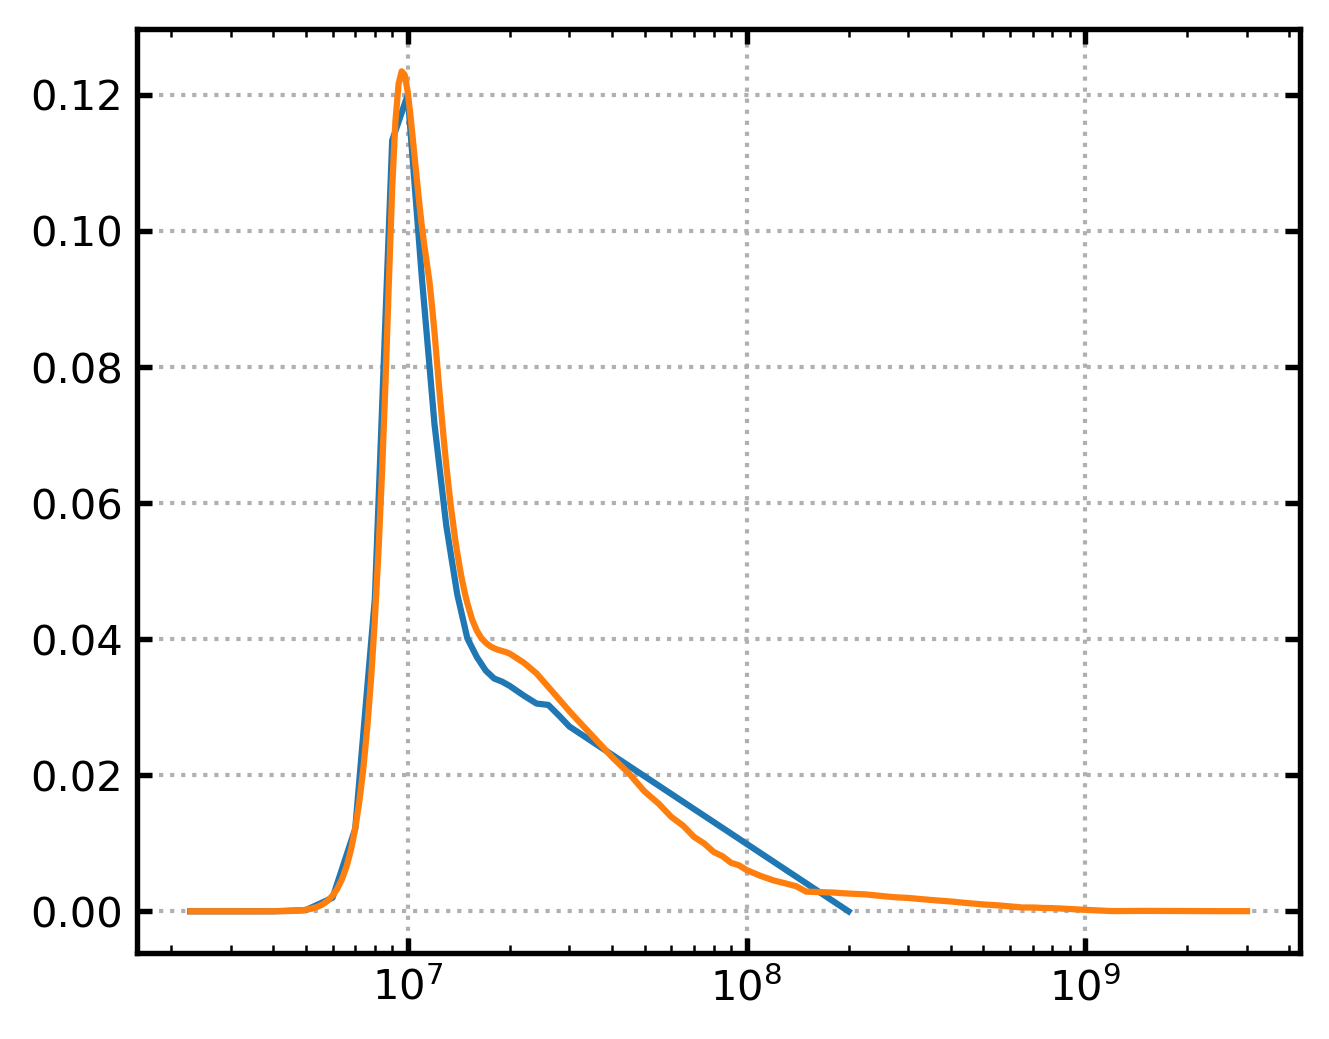

In [392]:
w_x = np.loadtxt(absolute_path + "/plotdata_cross/theory/w184_rn184_p_x.txt")
w_n = np.loadtxt(absolute_path + "/plotdata_cross/theory/w184_rn184_p_n.txt")
plt.plot(w_n[:,0], w_n[:,1])
plt.plot(w_x[:,0], w_x[:,1])
plt.xscale("log")
#plt.yscale("log")
plt.show()

# TUNGSTEN CROSS

In [105]:
def plot_cross(paths):
    plt.rc("figure", figsize=(5,3), dpi=300)
    formatter = ['-','--', '-.','--', '-.','-','--', '-.','-','--', '-.']
    products = ["BE7", "KR88", "NB97", "BR84", "RE178", "RE179", "RE180", "RE183"]
    for product, formats in zip(products, formatter):
        new_list = [i for i in paths if i.split("/")[-1].split(".")[0].split("_")[-1].upper() == product]
        w_1 = np.loadtxt(new_list[0])  # w182
        w_2 = np.loadtxt(new_list[1])  # w183
        w_3 = np.loadtxt(new_list[2])  # w184
        w_4 = np.loadtxt(new_list[3])  # w186
        
        lowest_value = min(w_1.min(), w_2.min(), w_3.min(), w_4.min())
        highest_value = max(w_1.max(), w_2.max(), w_3.max(), w_4.max())
        
        xs = np.linspace(lowest_value, 300e6, 1000)
        ys_1 = np.interp(xs, w_1[:,0], w_1[:,1])
        ys_2 = np.interp(xs, w_2[:,0], w_2[:,1])
        ys_3 = np.interp(xs, w_3[:,0], w_3[:,1])
        ys_4 = np.interp(xs, w_4[:,0], w_4[:,1])
        
        plt.plot(xs/1e6, ys_1*0.265+ys_2*0.1431+ys_3*0.3064+ys_4*28.43, formats,
                 label=r"$\sigma_{\mathrm{" + "W0(P,X)" + product + "}}$")
        
    plt.yscale("log") 
    plt.ylabel("Cross-section [barns]")
    plt.xlabel("Energy [MeV]")
    plt.legend(bbox_to_anchor=(1.36, 1), loc='upper right')

    return

In [77]:
paths = glob.glob(absolute_path + "/plotdata_cross/tungsten/*.txt")
paths.sort()

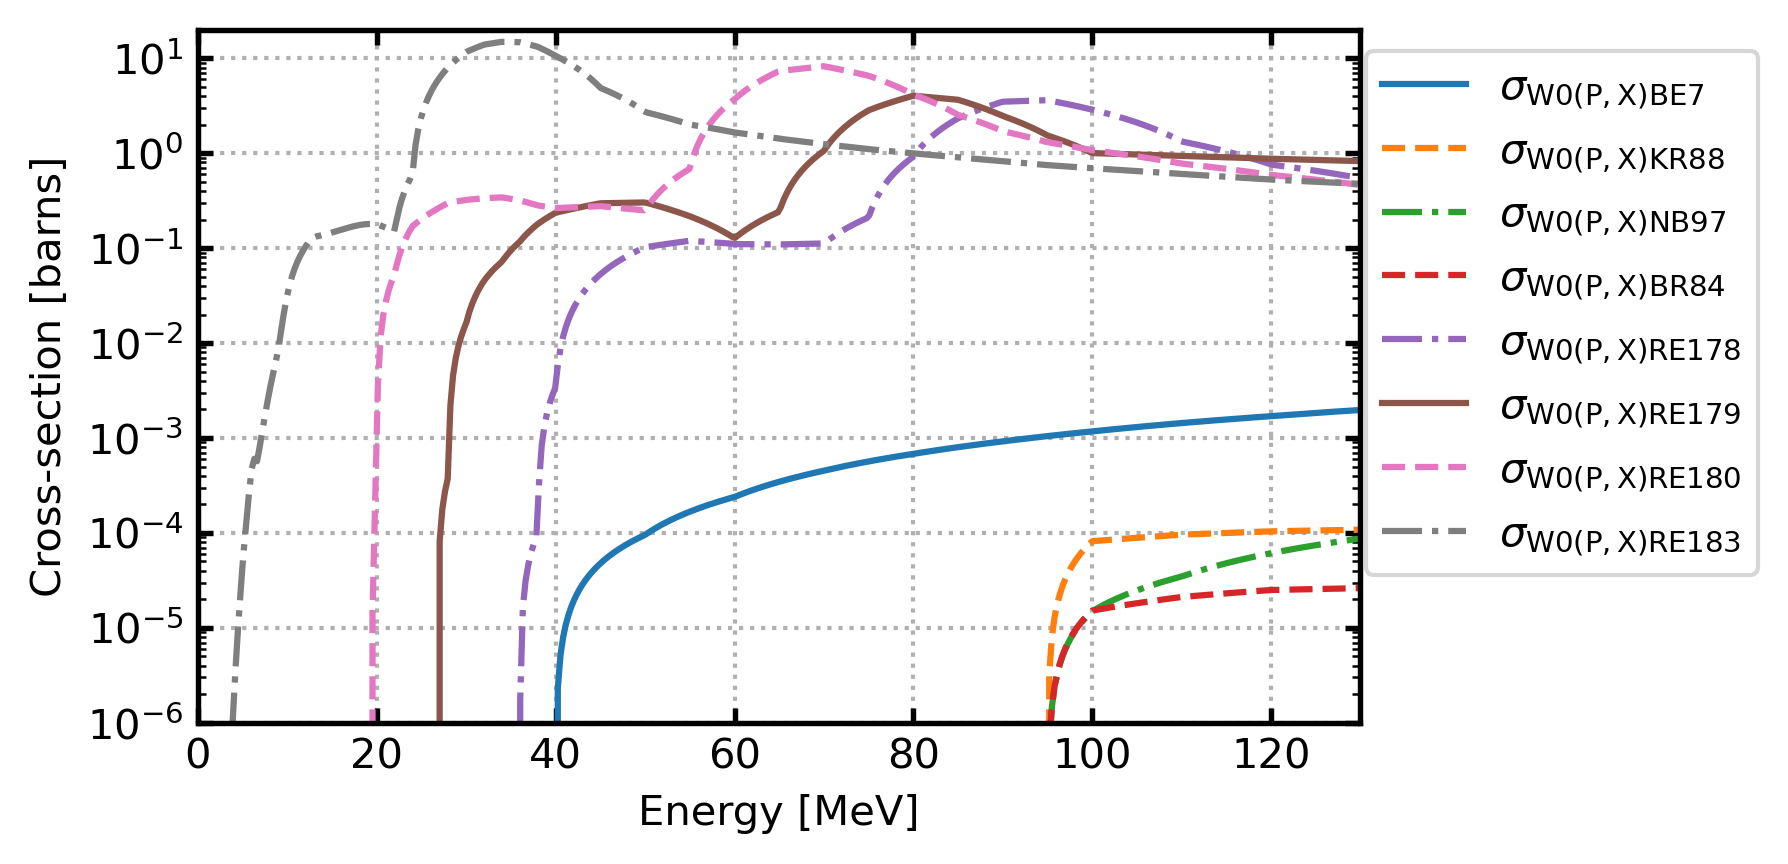

In [106]:
plot_cross(paths)
#plt.xscale("log")
plt.ylim(1e-6, 20)
plt.xlim(0, 130)
#plt.savefig("figure")
plt.show()


# BRASS CROSS

In [108]:
p1 = absolute_path + "/plotdata_cross/brass/cu0_N,X_cu62.txt"
p2 = absolute_path + "/plotdata_cross/brass/cu0_P,X_co56.txt"
p3 = absolute_path + "/plotdata_cross/brass/cu0_P,X_zn63.txt"
p4 = absolute_path + "/plotdata_cross/brass/cu0_P,X_cu61_exfor.txt"

p1_name = p1.split("/")[-1].split(".")[0]
p2_name = p2.split("/")[-1].split(".")[0]
p3_name = p3.split("/")[-1].split(".")[0]
p4_name = p4.split("/")[-1].split(".")[0]


w_x = np.loadtxt(p1)
w_n = np.loadtxt(p2)
w_k = np.loadtxt(p3)
w_4 = np.loadtxt(p4)

In [109]:
xs = np.linspace(w_k[0,0], w_k[-1,0], 100)
ys_1 = np.interp(xs, w_n[:,0], w_n[:,1])
ys_2 = np.interp(xs, w_x[:,0], w_x[:,1])
ys_3 = np.interp(xs, w_k[:,0], w_k[:,1])

In [134]:
plt.rc("figure", figsize=(6,3), dpi=300)
plt.plot(w_x[:,0]/1e6, w_x[:,1], "-.", label=r"$\sigma_{\mathrm{" + "Cu\!-\!0(N,X)Cu\!-\!62" + "}}$")
plt.plot(w_n[:,0]/1e6, w_n[:,1], "-", label=r"$\sigma_{\mathrm{" + "Cu\!-\!0(P,X)Co\!-\!56" + "}}$")
plt.plot(w_k[:,0]/1e6, w_k[:,1], "--", label=r"$\sigma_{\mathrm{" + "Cu\!-\!0(P,X)Zn\!-\!63" + "}}$"
         , color="silver")
plt.errorbar(w_4[:,0], w_4[:,1]/100, fmt="-x", yerr=w_4[:,2]/100, xerr=w_4[:,3], ms=2,
             label=r"$\sigma_{\mathrm{" + "Cu\!-\!0(P,X)Cu\!-\!61" + "}}$")

#plt.plot(xs/1e6, ys_1+ys_2+ys_3, "--", label=r"$\sigma _{tot}$", color="black")
#plt.plot(xs_sum, ys_sum)
#plt.xscale("log")
plt.xlim(0, 120)
plt.ylim(5e-5, 3)
plt.yscale("log")
plt.ylabel("Cross-section [barns]")
plt.xlabel("Energy [MeV]")
plt.legend()
plt.show()

# THEORY CROSS

In [136]:
w_x = np.loadtxt(absolute_path + "/plotdata_cross/theory/zn_64_co60_n_D_he3.txt")
w_n = np.loadtxt(absolute_path + "/plotdata_cross/theory/zn_64_co_60_n_pa.txt")
w_k = np.loadtxt(absolute_path + "/plotdata_cross/theory/zn64_co60_n_n_mark_p_he3.txt")

In [137]:
xs = np.linspace(w_n[0,0], w_n[-1,0], 100)
ys_1 = np.interp(xs, w_n[:,0], w_n[:,1])
ys_2 = np.interp(xs, w_x[:,0], w_x[:,1])
ys_3 = np.interp(xs, w_k[:,0], w_k[:,1])

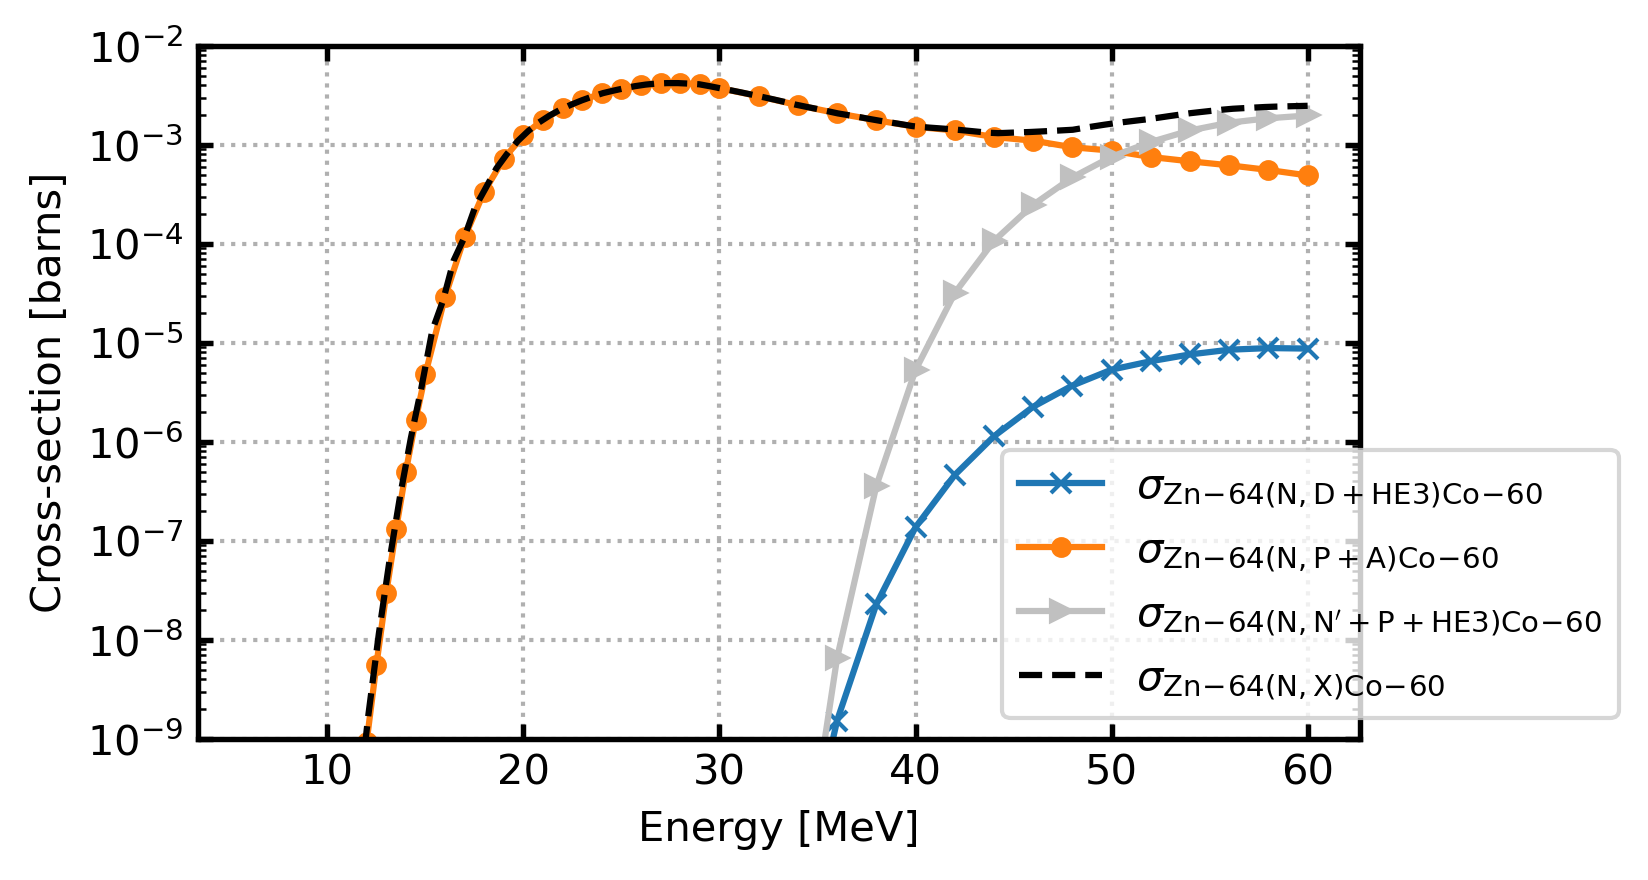

In [145]:
plt.rc("figure", figsize=(5,3), dpi=300)
plt.plot(w_x[:,0]/1e6, w_x[:,1], "-x", ms=5, label=r"$\sigma_{\mathrm{" + "Zn\!-\!64(N,D+HE3)Co\!-\!60" + "}}$")
plt.plot(w_n[:,0]/1e6, w_n[:,1], "-o", ms=4, label=r"$\sigma_{\mathrm{" + "Zn\!-\!64(N,P+A)Co\!-\!60" + "}}$")
plt.plot(w_k[:,0]/1e6, w_k[:,1], "->", ms=5, label=r"$\sigma_{\mathrm{" + "Zn\!-\!64(N,N'+P+HE3)Co\!-\!60" + "}}$",
         color="silver")
plt.plot(xs/1e6, ys_1+ys_2+ys_3, "--", label=r"$\sigma_{\mathrm{" + "Zn\!-\!64(N,X)Co\!-\!60" + "}}$"
         , color="black")
#plt.plot(xs_sum, ys_sum)
#plt.xscale("log")
plt.ylim(1e-9, 1e-2)
plt.yscale("log")
plt.ylabel("Cross-section [barns]")
plt.xlabel("Energy [MeV]")
plt.legend(bbox_to_anchor=(1.24, 0), loc='lower right')
plt.show()